# **Paper Helicopter Experiment** 
---
#### **Daniel Cisneros - Experimental Design** 

## **Walkthrough and Findings:**

For this experiment we have **22 Files** from different students with unique type of paper helicopters **dropped at different heights to measure flight time** with the following designs:

- **WingLength**: 6.5 cm,  8 cm, 9.5 cm
- **BodyLength:** 6.5 cm, 8 cm, 9.5 cm
- **BodyWidth:** 4 cm, 5 cm, 6 cm
- **PaperClip:** y, n
- **Tape:** y, n


**Steps:**
1. **Reading and Cleaning Files**
2. **Combining Files**
3. **Explore Combined Data**
4. **Data Insights and Viz**
5. **Create Models**
    - **Regression Model 1 and Random Forest**
        - Observations and Summary
    - **Regression Model 2 and Random Forest**
        - Observations and Summary
6. **Summary and Optimal Helicopter**

Files had outliers, written mistakes, missing columns, missing headers, and additional information. 

After combining the files, additional changes needed to be done such as one-hot-encoding for categorical values, additional outliers, additional unique parameters, duplicates

There were some extreme outliers specially on the data collected at 3.0 meters which seems unreasonable which one can conclude that the experiment was not collected appropiatly or there were some extreme conditions. 

Model 1 had an $R^2$ = 77.9% which is slightly lower to Model 2 with a $R^2$ = 78.7% with both having high adjusted R-squared. Based on these results which includes linear, quadratic, and interaction terms. One can say that the drop height is one of the dominant key terms but there seems to be an optimal height for our helicopter. Having very short or very long wings benefits the design but not a mid-range wings creating like U-shape, long wings are more effective at higher drops. Longer bodies also seem to increase flight time and longer bodies at higher drops increases fligh time. It also seems that wider bodies at higher drops increase the time. All these factors can be affected by different conditions such as being more stable, air resistance, center of mass.

The combinations to avoid are having very long wings with body long bodies at the same time. Of course, low heights will reduce the time. Also having mid range wings seems not optimal for any case. 

In [1]:
# Libraries 
import pandas as pd
import glob as gb
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm

In [2]:
# Getting All File Paths
file1 = 'Final_csv/Abudukamali _Tunuke_All.csv'
file2 = 'Final_csv/Akhondzadeh_Mina_All.csv' 
file3 = 'Final_csv/AL KRDY_MAJED_All.csv'
file4 = 'Final_csv/Alott_Aws_All.csv.csv'
file5 = 'Final_csv/Anik_BMTazbiulHassan_All.csv'
file6 = 'Final_csv/Cisneros_Daniel_All.csv'
file7 = 'Final_csv/Cushing_Jackson_All.csv'
file8 = 'Final_csv/Garcia_Benjamin_All.csv'
file9 = 'Final_csv/Hurtado_Michael_All.csv'
file10 = 'Final_csv/Iqra_Sanjida_Afroz_All.csv'
file11 = 'Final_csv/Jia_Jeffrey_All-5.csv'
file12 = 'Final_csv/Koppula_SreeHarsha_All - Sheet1.csv'
file13 = 'Final_csv/Leburu_Amogh_All-1.csv'
file14 = 'Final_csv/Martynuk - Ania_All.csv' 
file15 = 'Final_csv/Neal_Bryson_All.csv'
file16 = 'Final_csv/Paper Helicopter DF - All Experiments DF.csv'
file17 = 'Final_csv/Tahmid_Md Mushtaque_All-2.csv' 
file18 = 'Final_csv/Uibeom Chun_All experiments CSVs-1.csv'
file19 = 'Final_csv/Iyer_Gautam_All-2.xlsx'
file20 = 'Final_csv/AllExperimentInsan.csv'
file21 = 'Final_csv/Pamidipati_Saureesh_All.csv'
# This file seems to be corrupted/ not in the right format
file22 = 'Final_csv/Koppula_SreeHarsha_All.numbers' # Cannot open manually or through other software methods. 

In [3]:
# Columns that every file should have
expected_columns = ['NID','Date','Time','DropNumber','HelicopterID','WingLength', 'BodyLength',
                    'BodyWidth','PaperClip','Tape','DropHeight','FlightTime','Notes', 'Assignment']

In [4]:
# Analyze the file and provide important to basic information. 
def analyze_csv(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Basic information
    print(f"\nFile: {file_path}")
    print(f"Total rows: {len(df)}")
    print(f"Number of columns: {len(df.columns)}")
    print("\nColumn details:")

    # Check for missing columns, grammar errors or additional columns 
    missing_columns = set(expected_columns) - set(df.columns)
    unexpected_columns = set(df.columns) - set(expected_columns)
    
    # Check for missing columns 
    if missing_columns:
        print("missing_columns", missing_columns)
    else:
        print("No missing columns")
    
    # Check for additional columns or typo of grammar errors
    if unexpected_columns:
        print("Additional Column or Typos", unexpected_columns)
    else:
        print("No addtional Columns or Typos")
    # Analyze each column
    for column in df.columns:
        print(f"\nColumn: {column}")
        print(f"Data type: {df[column].dtype}")
        
        # Count unique values
        unique_count = df[column].nunique()
        print(f"Unique values count: {unique_count}")
        
        # Show sample unique values (up to 20)
        # This can be reduced based on the file and unique findings.
        if unique_count > 0:
            unique_values = df[column].unique()
            print("Unique values:")
            for val in unique_values[:20]:  # Show first 20 unique values
                print(f" - {val}")
            if unique_count > 20:
                print(f" - ...and {unique_count-20} more")
               
        # Count missing values
        missing = df[column].isna().sum()
        print(f"Missing values: {missing} ({missing/len(df)*100:.1f}%)")


### **Files**

#### **File1**

In [5]:
# Reading and Analyzing Data
df1 = pd.read_csv(file1)
analyze_csv(file1)


File: Final_csv/Abudukamali _Tunuke_All.csv
Total rows: 55
Number of columns: 14

Column details:
missing_columns {'WingLength'}
Additional Column or Typos {'WingLenght'}

Column: NID
Data type: object
Unique values count: 20
Unique values:
 - tu845860
 - tu845861
 - tu845862
 - tu845863
 - tu845864
 - tu845865
 - tu845866
 - tu845867
 - tu845868
 - tu845869
 - tu845870
 - tu845871
 - tu845872
 - tu845873
 - tu845874
 - tu845875
 - tu845876
 - tu845877
 - tu845878
 - tu845879
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 4
Unique values:
 - 1/15/2024
 - 1/30/2024
 - 3/14/2025
 - 3/26/2025
Missing values: 0 (0.0%)

Column: Time
Data type: object
Unique values count: 50
Unique values:
 - 13:50
 - 14:00
 - 14:09
 - 14:16
 - 14:34
 - 14:41
 - 11:11
 - 11:29
 - 11:45
 - 11:57
 - 12:08
 - 11:15
 - 11:31
 - 11:46
 - 11:58
 - 12:09
 - 11:13
 - 11:30
 - 11:18
 - 11:32
 - ...and 30 more
Missing values: 0 (0.0%)

Column: DropNumber
Data type: int64
Unique values c

Only the **assigment column has missing value **but is not relevant for the experiment.** One of the columns is misspelled "WingLenght"** we need to change this string. 

In [6]:
# Renaming the column correctly and adding the missing column 
df1 = df1.rename(columns={'WingLenght': 'WingLength'})

In [7]:
df1.columns

Index(['NID', 'Date', 'Time', 'DropNumber', 'HelicopterID', 'WingLength',
       'BodyLength', 'BodyWidth', 'PaperClip', 'Tape', 'DropHeight',
       'FlightTime', 'Notes', 'Assignment'],
      dtype='object')

In [8]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df1["FlightTime"]))

outliers_z = df1[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[0.02963526 1.34948832 0.32381937 2.00146393 0.60210165 0.20455554
 1.14710121 1.13119937 1.09939568 1.44923625 0.46332191 0.46332191
 0.51102745 1.01988646 0.73365327 1.30611966 1.50850676 2.03326762
 1.33358648 1.52440861 1.69932889 0.1886537  0.51102745 0.22479425
 0.90857355 0.59053667 0.1886537  0.87676986 0.98808277 0.74955511
 0.08167765 0.12504632 0.85653115 1.4130957  0.4430832  0.59053667
 0.63390533 0.80882562 0.20889241 0.36357398 0.19299056 0.23635923
 0.50669058 0.90857355 0.0455371  0.31586845 0.82906433 0.67004589
 0.03397212 1.30611966 0.19299056 0.0455371  0.82906433 3.00328012
 1.76727314]

Outliers based on Z-score > 3:
         NID  DropHeight  FlightTime      Notes
53  tu845860        3.56        2.79  SU Meetup


In [9]:
df1 = df1.drop(index=53)

**Data is Clean and Ready to Combine**

#### **File 2**

In [10]:
df2 = pd.read_csv(file2)
analyze_csv(file2)


File: Final_csv/Akhondzadeh_Mina_All.csv
Total rows: 86
Number of columns: 14

Column details:
No missing columns
No addtional Columns or Typos

Column: NID
Data type: object
Unique values count: 1
Unique values:
 - mi130176
 - nan
Missing values: 44 (51.2%)

Column: Date
Data type: object
Unique values count: 4
Unique values:
 - 2025-01-30
 - 2025-02-26
 - 2025-03-26
 - 2025-03-27
Missing values: 0 (0.0%)

Column: Time
Data type: float64
Unique values count: 25
Unique values:
 - 1310.0
 - 1311.0
 - 1309.0
 - 1313.0
 - 1315.0
 - 1318.0
 - 1317.0
 - 1319.0
 - 1702.0
 - 1657.0
 - 1658.0
 - 1701.0
 - 1705.0
 - 1700.0
 - 1704.0
 - 1706.0
 - 1659.0
 - 1703.0
 - 1935.0
 - 1942.0
 - ...and 5 more
Missing values: 37 (43.0%)

Column: HelicopterID
Data type: object
Unique values count: 40
Unique values:
 - H1
 - H2
 - H3
 - H4
 - H0
 - H5
 - H6
 - H7
 - H8
 - H9
 - H10
 - H11
 - H12
 - H13
 - H14
 - as1123
 - bm9064
 - sk2310
 - sa920932
 - md8910
 - ...and 20 more
Missing values: 0 (0.0%)

Col

**File 2** have **missing values on NID column with (44/51%)**, **HelicopterID have others students IDs**. Notes also have 51% of the values missing. Further exploration needs to be done. 

In [11]:
df2

,NID,Date,Time,HelicopterID,WingLength,BodyLength,BodyWidth,PaperClip,Tape,DropHeight,DropNumber,FlightTime,Notes,Assignment
0,mi130176,2025-01-30,1310.0,H1,9.5,6.5,4.0,y,n,2.54,2,2.43,Experiment location: home,2 Factorial experiments
1,mi130176,2025-01-30,1311.0,H2,6.5,6.5,4.0,y,n,2.54,4,1.99,Experiment location: home,2 Factorial experiments
2,mi130176,2025-01-30,1309.0,H3,9.5,6.5,4.0,n,n,2.54,1,2.73,Experiment location: home,2 Factorial experiments
3,mi130176,2025-01-30,1310.0,H4,6.5,6.5,4.0,n,n,2.54,3,1.98,Experiment location: home,2 Factorial experiments
4,mi130176,2025-01-30,1313.0,H1,9.5,6.5,4.0,y,n,2.54,7,2.41,Experiment location: home,2 Factorial experiments
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,NaN,2025-03-26,NaN,sa920932,9.5,9.5,4.0,n,y,8.50,40,7.63,NaN,Student Union
82,NaN,2025-03-26,NaN,by4479,6.5,9.5,6.0,n,y,8.50,41,4.85,NaN,Student Union
83,NaN,2025-03-26,NaN,bg8156,6.5,6.5,6.0,y,y,8.50,42,6.08,NaN,Student Union
84,NaN,2025-03-26,NaN,am0777,9.5,9.5,4.0,n,n,8.50,43,6.88,NaN,Student Union


In [12]:
# Get rows with ANY NaN values
nan_rows = df2[df2.isna().any(axis=1)]  # axis=1 checks row-wise
nan_rows

,NID,Date,Time,HelicopterID,WingLength,BodyLength,BodyWidth,PaperClip,Tape,DropHeight,DropNumber,FlightTime,Notes,Assignment
42,NaN,2025-03-26,1935.0,as1123,6.5,6.5,6.0,n,n,3.56,1,2.37,NaN,Student Union
43,NaN,2025-03-26,1942.0,bm9064,6.5,9.5,4.0,n,n,3.56,2,3.69,NaN,Student Union
44,NaN,2025-03-26,1944.0,sk2310,9.5,6.5,6.0,y,n,3.56,3,2.92,NaN,Student Union
45,NaN,2025-03-26,1946.0,sa920932,9.5,9.5,4.0,n,y,3.56,4,2.86,NaN,Student Union
46,NaN,2025-03-26,1947.0,md8910,9.5,6.5,4.0,y,n,3.56,5,3.37,NaN,Student Union
47,NaN,2025-03-26,1949.0,arl2002,6.5,6.5,4.0,n,n,3.56,6,2.59,NaN,Student Union
48,NaN,2025-03-26,1951.0,sa449470,6.5,9.5,6.0,y,n,3.56,7,2.84,NaN,Student Union
49,NaN,2025-03-26,NaN,ks0327,9.5,9.5,6.0,y,n,3.56,8,2.67,NaN,Student Union
50,NaN,2025-03-26,NaN,ia5043,6.5,6.5,6.0,n,y,3.56,9,2.56,NaN,Student Union
51,NaN,2025-03-26,NaN,dc4286,9.5,9.5,6.0,n,y,3.56,10,2.79,NaN,Student Union


It looks like the missing values appreared to be from the last experiment from all students at the student union. We have drop those rows that have NID NaN 

In [13]:
df2 = df2.dropna(subset=['NID','Date', 'Time', 'DropNumber', 
                       'HelicopterID', 'DropHeight', 'FlightTime'])

In [14]:
print(df2.isna().sum())

NID             0
Date            0
Time            0
HelicopterID    0
WingLength      0
BodyLength      0
BodyWidth       0
PaperClip       0
Tape            0
DropHeight      0
DropNumber      0
FlightTime      0
Notes           0
Assignment      0
dtype: int64


In [15]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df2["FlightTime"]))

outliers_z = df2[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[0.56469501 1.10767099 1.70494456 1.14567931 0.48867838 1.10767099
 1.89498615 0.27148799 1.3628697  1.10767099 0.98278652 1.48775417
 0.9447782  1.14567931 1.55291129 0.53754622 1.13481979 1.3357209
 1.62892793 0.65157117 0.0814464  1.71580408 0.9176294  0.00542976
 0.83075324 0.11945471 1.24884474 0.26062847 0.84161276 0.9176294
 0.86876156 0.37465342 0.1085952  0.03257856 1.13481979 0.60270333
 1.14567931 0.68957949 1.29771258 0.18461183 0.0814464  0.19547135]

Outliers based on Z-score > 3:
Empty DataFrame
Columns: [NID, DropHeight, FlightTime, Notes]
Index: []


**Data is Clean and Ready to Combine**

#### **File 3**

In [16]:
df3 = pd.read_csv(file3)
analyze_csv(file3)


File: Final_csv/AL KRDY_MAJED_All.csv
Total rows: 22
Number of columns: 14

Column details:
No missing columns
No addtional Columns or Typos

Column: NID
Data type: object
Unique values count: 1
Unique values:
 - ma231801
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 2
Unique values:
 - 1/30/2025
 - 3/26/2025
Missing values: 0 (0.0%)

Column: Time
Data type: int64
Unique values count: 12
Unique values:
 - 2130
 - 2131
 - 2133
 - 2134
 - 2136
 - 2137
 - 2139
 - 2140
 - 2143
 - 2144
 - 2011
 - 2037
Missing values: 0 (0.0%)

Column: DropNumber
Data type: int64
Unique values count: 22
Unique values:
 - 1
 - 2
 - 3
 - 4
 - 5
 - 6
 - 7
 - 8
 - 9
 - 10
 - 11
 - 12
 - 13
 - 14
 - 15
 - 16
 - 17
 - 18
 - 19
 - 20
 - ...and 2 more
Missing values: 0 (0.0%)

Column: HelicopterID
Data type: object
Unique values count: 5
Unique values:
 - H2
 - H4
 - H3
 - H1
 - H5
Missing values: 0 (0.0%)

Column: WingLength
Data type: float64
Unique values count: 2
Unique values:
 

In [17]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df3["FlightTime"]))

outliers_z = df3[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[0.73272024 0.20288469 0.09049533 0.0700609  0.15471782 0.16639464
 1.29466704 0.07443971 0.03794965 0.6363865  0.10217215 0.15471782
 0.23061713 0.39555216 0.47145147 0.47145147 0.33132967 0.33132967
 0.65244213 0.32695086 0.94144334 4.11607784]

Outliers based on Z-score > 3:
         NID  DropHeight  FlightTime         Notes
21  ma231801         8.5        5.52  StudentUnion


In [18]:
df3 = df3.drop(index=21)

**File3** has no anomalies or missing values. 

#### **File 4**

In [19]:
df4 = pd.read_csv(file4)
analyze_csv(file4)


File: Final_csv/Alott_Aws_All.csv.csv
Total rows: 20
Number of columns: 13

Column details:
missing_columns {'Assignment'}
No addtional Columns or Typos

Column: NID
Data type: object
Unique values count: 1
Unique values:
 - aw210724
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 1
Unique values:
 - 1/30/2025
Missing values: 0 (0.0%)

Column: Time
Data type: int64
Unique values count: 9
Unique values:
 - 2150
 - 2151
 - 2152
 - 2153
 - 2154
 - 2155
 - 2156
 - 2157
 - 2158
Missing values: 0 (0.0%)

Column: DropNumber
Data type: int64
Unique values count: 20
Unique values:
 - 1
 - 2
 - 3
 - 4
 - 5
 - 6
 - 7
 - 8
 - 9
 - 10
 - 11
 - 12
 - 13
 - 14
 - 15
 - 16
 - 17
 - 18
 - 19
 - 20
Missing values: 0 (0.0%)

Column: HelicopterID
Data type: object
Unique values count: 4
Unique values:
 - H1
 - H2
 - H3
 - H4
Missing values: 0 (0.0%)

Column: WingLength
Data type: float64
Unique values count: 1
Unique values:
 - 9.5
Missing values: 0 (0.0%)

Column: BodyLengt

In [20]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df4["FlightTime"]))

outliers_z = df4[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[1.11577497 2.37891645 0.6479448  0.49823914 0.56841367 0.53098725
 0.87250328 0.45145612 1.13916648 0.87250328 0.43742122 1.55085704
 0.88185988 0.33449858 0.32046367 0.68537121 0.25028915 0.90525139
 1.457291   1.31694195]

Outliers based on Z-score > 3:
Empty DataFrame
Columns: [NID, DropHeight, FlightTime, Notes]
Index: []


**File4** has a missing column which assigment. Not relevant for the experiment. 

#### **File5**

In [21]:
df5 = pd.read_csv(file5)
analyze_csv(file5)


File: Final_csv/Anik_BMTazbiulHassan_All.csv
Total rows: 50
Number of columns: 14

Column details:
No missing columns
No addtional Columns or Typos

Column: NID
Data type: object
Unique values count: 1
Unique values:
 - bm638305
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 4
Unique values:
 - 1/19/25
 - 2/1/25
 - 2/28/25
 - 3/26/25
Missing values: 0 (0.0%)

Column: Time
Data type: object
Unique values count: 43
Unique values:
 - 10:33:00
 - 11:23:00
 - 11:55:00
 - 16:03:00
 - 16:25:00
 - 16:43:00
 - 11:30:00
 - 16:39:00
 - 11:37:00
 - 16:47:00
 - 16:10:00
 - 10:37:00
 - 16:44:00
 - 10:42:00
 - 16:33:00
 - 16:37:00
 - 11:32:00
 - 16:15:00
 - 11:38:00
 - 10:36:00
 - ...and 23 more
Missing values: 1 (2.0%)

Column: DropNumber
Data type: int64
Unique values count: 7
Unique values:
 - 1
 - 2
 - 3
 - 4
 - 5
 - 6
 - 35
Missing values: 0 (0.0%)

Column: HelicopterID
Data type: object
Unique values count: 16
Unique values:
 - H1
 - H2
 - H3
 - H4
 - H5
 - H6
 -

In [22]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df5["FlightTime"]))

outliers_z = df5[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[2.34586169e-01 3.76950342e-02 3.08844679e-01 2.87627962e-01
 1.29634142e-01 4.83033927e-02 1.74472137e-01 2.80555723e-01
 2.98236321e-01 2.27513930e-01 1.92152735e-01 3.76950342e-02
 1.39110942e-01 5.53756318e-02 3.38265194e-01 1.03749747e-01
 4.75042297e-01 1.74472137e-01 3.33597516e-01 3.68958711e-01
 1.92152735e-01 4.57361700e-01 1.39110942e-01 2.62875126e-01
 1.03749747e-01 4.75042297e-01 3.86639309e-01 2.45194528e-01
 4.04319907e-01 1.39110942e-01 3.30273564e-02 2.80555723e-01
 2.27513930e-01 1.74472137e-01 1.92152735e-01 2.62875126e-01
 3.68958711e-01 3.38265194e-01 3.51278114e-01 1.08417425e-01
 2.98236321e-01 4.22000504e-01 2.33383889e-03 3.76950342e-02
 3.33597516e-01 4.39681102e-01 1.56791540e-01 1.43778620e-01
 2.21240854e+00 6.45575198e+00]

Outliers based on Z-score > 3:
         NID  DropHeight  FlightTime                    Notes
49  bm638305         8.5        5.49  Location: Student Union


**File5** has **1 missing value for the column Time** which is not relevant for the experiments. P.S is Time is not in military format. Outlier is from SU which is okay. 

#### **File6**

In [23]:
df6 = pd.read_csv(file6)
analyze_csv(file6)


File: Final_csv/Cisneros_Daniel_All.csv
Total rows: 43
Number of columns: 14

Column details:
missing_columns {'Assignment'}
Additional Column or Typos {'Assisgment'}

Column: NID
Data type: object
Unique values count: 1
Unique values:
 - da703145
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 3
Unique values:
 - nan
 - 2025-02-02
 - 2025-03-02
 - 2025-03-26
Missing values: 6 (14.0%)

Column: Time
Data type: float64
Unique values count: 37
Unique values:
 - nan
 - 1900.0
 - 1901.0
 - 1902.0
 - 1903.0
 - 1904.0
 - 1905.0
 - 1906.0
 - 1907.0
 - 1908.0
 - 1909.0
 - 1910.0
 - 1911.0
 - 1912.0
 - 1913.0
 - 1914.0
 - 1915.0
 - 1916.0
 - 1917.0
 - 1918.0
 - ...and 17 more
Missing values: 6 (14.0%)

Column: DropNumber
Data type: float64
Unique values count: 21
Unique values:
 - nan
 - 1.0
 - 2.0
 - 3.0
 - 4.0
 - 5.0
 - 6.0
 - 7.0
 - 8.0
 - 9.0
 - 10.0
 - 11.0
 - 12.0
 - 13.0
 - 14.0
 - 15.0
 - 16.0
 - 17.0
 - 18.0
 - 19.0
 - ...and 1 more
Missing values: 6 (14.0

**File6** have some missing values for each column except Assignment. Assignment Column was misspelled 

In [24]:
# Renaming column
df6 = df6.rename(columns={'Assisgment': 'Assignment'})

In [25]:
df6

,NID,Date,Time,DropNumber,HelicopterID,WingLength,BodyLength,BodyWidth,PaperClip,Tape,DropHeight,FlightTime,Notes,Assignment
0,da703145,NaN,NaN,NaN,NaN,9.5,9.5,4,n,n,NaN,NaN,NaN,One-at-a-time
1,da703145,NaN,NaN,NaN,NaN,6.5,9.5,4,n,n,NaN,NaN,NaN,One-at-a-time
2,da703145,NaN,NaN,NaN,NaN,9.5,6.5,4,n,n,NaN,NaN,NaN,One-at-a-time
3,da703145,NaN,NaN,NaN,NaN,9.5,9.5,6,n,n,NaN,NaN,NaN,One-at-a-time
4,da703145,NaN,NaN,NaN,NaN,9.5,9.5,4,y,n,NaN,NaN,NaN,One-at-a-time
5,da703145,NaN,NaN,NaN,NaN,9.5,9.5,4,n,y,NaN,NaN,NaN,One-at-a-time
6,da703145,2025-02-02,1900.0,1.0,H1,9.5,9.5,4,n,n,2.00,1.96,Home,Factorial
7,da703145,2025-02-02,1901.0,2.0,H2,9.5,9.5,4,y,n,2.00,1.93,Home,Factorial
8,da703145,2025-02-02,1902.0,3.0,H3,9.5,9.5,4,n,y,2.00,1.95,Home,Factorial
9,da703145,2025-02-02,1903.0,4.0,H4,9.5,9.5,4,y,y,2.00,1.68,Home,Factorial


Missing values occour during the first experiment where no actual experiment was conducted. Therefore we need to drop those rows. 

In [26]:
# Dropping rows with missing values in these columns
df6 = df6.dropna(subset=['Date', 'Time', 'DropNumber', 
                       'HelicopterID', 'DropHeight', 'FlightTime'])

In [27]:
print(df6.isna().sum())

NID             0
Date            0
Time            0
DropNumber      0
HelicopterID    0
WingLength      0
BodyLength      0
BodyWidth       0
PaperClip       0
Tape            0
DropHeight      0
FlightTime      0
Notes           0
Assignment      0
dtype: int64


In [28]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df6["FlightTime"]))

outliers_z = df6[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[5.24492713e-02 2.01055540e-02 4.16680322e-02 2.49425424e-01
 1.38699184e-01 4.45818806e-02 7.40117495e-02 2.27862945e-01
 1.06355467e-01 3.38006415e-02 5.24492713e-02 2.17081706e-01
 4.16680322e-02 2.30194024e-02 1.17136706e-01 1.73956750e-01
 7.40117495e-02 1.45692420e-03 6.32305104e-02 2.17081706e-01
 2.17081706e-01 1.63175511e-01 6.15987553e-01 2.27862945e-01
 3.14112858e-01 3.46456575e-01 4.97393923e-01 6.91456227e-01
 2.38644184e-01 4.86612684e-01 3.03331619e-01 5.72862597e-01
 3.89581532e-01 5.94425075e-01 6.05206314e-01 9.47292117e-01
 5.72338104e+00]

Outliers based on Z-score > 3:
         NID  DropHeight  FlightTime          Notes
42  da703145         8.5        7.22  Ran into wall


Outlier has a note which makes it an extreme. 

In [29]:
df6 = df6.drop(index=42)

**Data is Clean and Ready to Combine**

#### **File7**

In [30]:
df7 = pd.read_csv(file7)
analyze_csv(file7)


File: Final_csv/Cushing_Jackson_All.csv
Total rows: 53
Number of columns: 15

Column details:
missing_columns {'Assignment'}
Additional Column or Typos {'Location', 'Assignment #'}

Column: NID
Data type: object
Unique values count: 1
Unique values:
 - ja278783
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 2
Unique values:
 - nan
 - 1/30/2024
 - 3/14/2025
Missing values: 6 (11.3%)

Column: Location
Data type: object
Unique values count: 1
Unique values:
 - nan
 - College of science lobby
Missing values: 6 (11.3%)

Column: Time
Data type: object
Unique values count: 42
Unique values:
 - nan
 - 10:45
 - 11:22
 - 11:36
 - 11:51
 - 12:02
 - 10:55
 - 11:23
 - 11:40
 - 11:52
 - 12:03
 - 10:52
 - 10:58
 - 11:24
 - 11:41
 - 11:53
 - 12:04
 - 17:14
 - 17:25
 - 17:28
 - ...and 22 more
Missing values: 6 (11.3%)

Column: DropNumber
Data type: float64
Unique values count: 37
Unique values:
 - nan
 - 1.0
 - 14.0
 - 26.0
 - 38.0
 - 50.0
 - 4.0
 - 16.0
 - 28.0
 - 40.0


**File7** has an extra column (Location) which needs to be drop. There is also some missing values in some columns. 

In [31]:
# Dropping column "Location"
df7 = df7.drop('Location', axis=1)

In [32]:
# Renaming column
df7 = df7.rename(columns={'Assignment #': 'Assignment'})

In [33]:
nan_rows7 = df7[df7.isna().any(axis=1)]  # NaN values for each row
nan_rows7

,NID,Date,Time,DropNumber,HelicopterID,WingLength,BodyLength,BodyWidth,PaperClip,Tape,DropHeight,FlightTime,Notes,Assignment
0,ja278783,NaN,NaN,NaN,NaN,9.5,9.5,6,y,y,NaN,NaN,NaN,1
1,ja278783,NaN,NaN,NaN,NaN,6.5,9.5,6,y,y,NaN,NaN,NaN,1
2,ja278783,NaN,NaN,NaN,NaN,9.5,6.5,6,y,y,NaN,NaN,NaN,1
3,ja278783,NaN,NaN,NaN,NaN,9.5,9.5,4,y,y,NaN,NaN,NaN,1
4,ja278783,NaN,NaN,NaN,NaN,9.5,9.5,6,n,y,NaN,NaN,NaN,1
5,ja278783,NaN,NaN,NaN,NaN,9.5,9.5,6,y,n,NaN,NaN,NaN,1
7,ja278783,1/30/2024,11:22,14.0,1.0,9.5,9.5,6,n,n,5.75,4.605,NaN,2
8,ja278783,1/30/2024,11:36,26.0,1.0,9.5,9.5,6,n,n,5.75,4.785,NaN,2
9,ja278783,1/30/2024,11:51,38.0,1.0,9.5,9.5,6,n,n,5.75,4.740,NaN,2
10,ja278783,1/30/2024,12:02,50.0,1.0,9.5,9.5,6,n,n,5.75,4.690,NaN,2


File7 **has empty rows for the first experiment which was theorical therefore we need to drop those columns**. Notes column also has NaN values but is not relevant for the experiment. 

In [34]:
# Dropping rows with missing values in these columns
df7 = df7.dropna(subset=['Date', 'Time', 'DropNumber', 
                       'HelicopterID', 'DropHeight', 'FlightTime'])

In [35]:
# Ensuring data does not contain any other missing values
print(df7.isna().sum())

NID              0
Date             0
Time             0
DropNumber       0
HelicopterID     0
WingLength       0
BodyLength       0
BodyWidth        0
PaperClip        0
Tape             0
DropHeight       0
FlightTime       0
Notes           45
Assignment       0
dtype: int64


In [36]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df7["FlightTime"]))

outliers_z = df7[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[0.37004671 0.39093077 0.00610096 0.09315697 0.20344356 0.3479894
 0.49136197 1.25233945 1.51702727 0.56856258 1.73760046 0.8332504
 0.67884917 1.47291264 1.15190826 0.14947353 3.02678033 0.18138625
 1.6812839  0.03918694 0.4901887  0.98765163 1.14205286 0.81119308
 0.11521429 0.40195943 1.41659608 2.18860223 0.8431058  0.5906199
 1.10779362 1.35042412 0.06124426 0.73281921 0.03918694 0.55636066
 0.93133507 1.03176627 0.29167284 0.66664725 0.92147968 0.70090649
 0.18138625 1.58319923 0.03918694 0.29167284 0.92147968]

Outliers based on Z-score > 3:
         NID  DropHeight  FlightTime Notes
22  ja278783        5.75        3.41   NaN


In [37]:
df7 = df7.drop(index=22)

**Data is Ready to Combine**

#### **File8**

In [38]:
df8 = pd.read_csv(file8)
analyze_csv(file8)


File: Final_csv/Garcia_Benjamin_All.csv
Total rows: 40
Number of columns: 14

Column details:
No missing columns
No addtional Columns or Typos

Column: NID
Data type: object
Unique values count: 1
Unique values:
 - be204033
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 3
Unique values:
 - 2025-01-31
 - 2025-03-15
 - 2025-03-26
Missing values: 0 (0.0%)

Column: Time
Data type: int64
Unique values count: 2
Unique values:
 - 1600
 - 1930
Missing values: 0 (0.0%)

Column: DropNumber
Data type: int64
Unique values count: 5
Unique values:
 - 1
 - 2
 - 3
 - 4
 - 5
Missing values: 0 (0.0%)

Column: HelicopterID
Data type: object
Unique values count: 15
Unique values:
 - H1
 - H2
 - H3
 - H4
 - H5
 - H6
 - H7
 - H8
 - H9
 - H10
 - H11
 - H12
 - H13
 - H14
 - H15
Missing values: 0 (0.0%)

Column: WingLength
Data type: float64
Unique values count: 4
Unique values:
 - 6.5
 - 9.0
 - 9.5
 - 8.0
Missing values: 0 (0.0%)

Column: BodyLength
Data type: float64
Unique va

In [39]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df8["FlightTime"]))

outliers_z = df8[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[0.3095787  0.59208398 2.39776357 0.20834764 0.80396295 0.34489186
 0.44376871 0.3966845  0.40374713 0.20363922 0.90283979 0.31428713
 0.06238658 0.25072344 1.06763454 0.79690031 0.03178184 0.73333663
 0.00823974 1.09117665 0.85104716 0.16832606 0.60385504 0.47437345
 1.63970773 0.6391682  1.00407085 2.1388004  0.90990243 0.76864979
 1.05115507 0.83927611 0.87929769 0.18009712 0.43906029 0.67448136
 0.54970819 0.64387662 1.23949192 3.31590574]

Outliers based on Z-score > 3:
         NID  DropHeight  FlightTime Notes
39  be204033         8.5        6.08   NaN


This outlier is not extreme since is from the SU experiment. 

**File8** have missing values for the Notes column which is not relevant for our experiment. 

#### **File9**

In [40]:
df9 = pd.read_csv(file9)
analyze_csv(file9)


File: Final_csv/Hurtado_Michael_All.csv
Total rows: 65
Number of columns: 14

Column details:
No missing columns
No addtional Columns or Typos

Column: NID
Data type: object
Unique values count: 1
Unique values:
 - mi012753
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 4
Unique values:
 - 1/20/2025
 - 1/30/2025
 - 2/18/2025
 - 3/26/2025
Missing values: 0 (0.0%)

Column: Time
Data type: float64
Unique values count: 43
Unique values:
 - 1045.0
 - 1046.0
 - 1047.0
 - 1049.0
 - 1050.0
 - 1051.0
 - 1053.0
 - 1054.0
 - 1055.0
 - 1057.0
 - 1058.0
 - 1100.0
 - 1101.0
 - 1104.0
 - 1105.0
 - 1106.0
 - 1108.0
 - 1109.0
 - 1110.0
 - 1111.0
 - ...and 23 more
Missing values: 1 (1.5%)

Column: DropNumber
Data type: int64
Unique values count: 31
Unique values:
 - 1
 - 2
 - 3
 - 4
 - 5
 - 6
 - 7
 - 8
 - 9
 - 10
 - 11
 - 12
 - 13
 - 14
 - 15
 - 16
 - 17
 - 18
 - 19
 - 20
 - ...and 11 more
Missing values: 0 (0.0%)

Column: HelicopterID
Data type: object
Unique values coun

In [41]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df9["FlightTime"]))

outliers_z = df9[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[0.54813938 0.60995961 0.15661125 0.87784728 0.50280454 0.81602705
 1.24876866 0.7954203  0.23491688 0.54813938 0.31734385 0.42037757
 0.19370339 0.0082427  0.25964497 0.79129895 0.0082427  0.42037757
 0.39977083 0.02884944 0.15661125 0.07418428 0.30085846 0.21431013
 0.17309665 0.4821978  0.3379506  0.29673711 0.72947872 0.34207194
 1.36828778 0.56462477 0.52341129 0.7954203  0.4821978  0.7954203
 1.55374847 0.70887198 0.19370339 0.25964497 1.98649008 0.58523152
 0.42037757 1.9452766  0.25964497 0.38328543 1.92466985 0.50280454
 0.58935287 0.83251244 0.02884944 0.48631915 0.30085846 0.11127642
 1.43422935 0.1524899  0.27613036 0.21843148 0.48631915 0.96027425
 0.71299333 0.58935287 0.44510566 1.26525406 5.53497133]

Outliers based on Z-score > 3:
         NID  DropHeight  FlightTime          Notes
64  mi012753         8.5        5.79  Student Union


Outlier is from SU experiment does not seem as an outlier. 

**File9** have some missing values for the Time which is not relevant for our experiment. 

#### **File10**

In [42]:
df10 = pd.read_csv(file10, encoding='utf-8')
analyze_csv(file10)


File: Final_csv/Iqra_Sanjida_Afroz_All.csv
Total rows: 65
Number of columns: 14

Column details:
missing_columns {'Notes', 'BodyWidth', 'DropHeight', 'BodyLength'}
Additional Column or Typos {'Notes \xa0 \xa0', 'BodyWidth\xa0', 'DropHeight ', 'BodyLength\xa0'}

Column: NID
Data type: object
Unique values count: 18
Unique values:
 - sa920932
 - sa920933
 - sa920934
 - sa920935
 - sa920936
 - sa920937
 - sa920938
 - sa920939
 - sa920940
 - sa920941
 - sa920942
 - sa920943
 - sa920944
 - sa920945
 - sa920946
 - sa920952
 - sa920953
 - sa920954
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 3
Unique values:
 - 1/20/2025
 - 2/2/2025
 - 3/1/2025
Missing values: 0 (0.0%)

Column: Time
Data type: int64
Unique values count: 56
Unique values:
 - 1701
 - 1710
 - 1712
 - 1715
 - 1717
 - 1709
 - 1720
 - 1723
 - 1724
 - 1728
 - 1740
 - 1742
 - 1744
 - 1746
 - 1748
 - 1848
 - 1850
 - 1910
 - 1500
 - 1516
 - ...and 36 more
Missing values: 0 (0.0%)

Column: HelicopterID


Looks like there is some extra space on the columns when reading the file as a csv. No other problem with file.

In [43]:
df10.columns = df10.columns.str.replace('\xa0', '').str.strip()

In [44]:
missing_columns = set(expected_columns) - set(df10.columns)
unexpected_columns = set(df10.columns) - set(expected_columns)

print(missing_columns, unexpected_columns)

set() set()


In [45]:
df10.head()

,NID,Date,Time,HelicopterID,WingLength,BodyLength,BodyWidth,PaperClip,Tape,DropHeight,DropNumber,FlightTime,Notes,Assignment
0,sa920932,1/20/2025,1701,H1,9.0,9.5,4,"""n""","""y""",10.67,1,4.80,Initial Test,1
1,sa920933,1/20/2025,1710,H1,9.0,9.5,4,"""n""","""y""",10.67,2,3.93,NaN,1
2,sa920934,1/20/2025,1712,H1,9.0,9.5,4,"""n""","""y""",10.67,3,4.03,NaN,1
3,sa920935,1/20/2025,1715,H1,9.0,9.5,4,"""n""","""y""",10.67,4,4.34,NaN,1
4,sa920936,1/20/2025,1717,H1,9.0,9.5,4,"""n""","""y""",10.67,5,4.99,NaN,1


In [46]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df10["FlightTime"]))

outliers_z = df10[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[0.03236148 0.86419854 0.76858508 0.47218337 0.14930409 2.16674799
 2.99858505 2.96990101 3.18025061 1.75561013 0.78770777 1.26577505
 0.64428759 1.72471963 0.93112795 0.92377307 1.50480868 0.44349933
 0.10885224 0.97893468 0.44349933 1.27754286 1.09367083 0.05369063
 0.35965369 1.0458641  1.27533639 0.22579485 0.85463719 0.73990104
 0.48174472 0.65384893 1.60998348 1.07454814 0.2044657  0.73990104
 0.88332123 0.46262202 0.06104551 0.41702176 0.27360158 0.1301814
 0.72298482 0.14709762 0.18754947 0.10885224 0.29272427 0.74210751
 0.49351253 0.340531   0.57956464 0.03456794 0.40746042 0.17578166
 0.60824867 0.52219656 0.12797493 0.11105871 0.2044657  0.53175791
 0.28095646 0.26404023 0.03456794 0.02280013 0.46482849]

Outliers based on Z-score > 3:
        NID  DropHeight  FlightTime Notes
8  sa920940       10.67        8.16   NaN


**File10 is good now.** 

#### **File11**

In [47]:
df11 = pd.read_csv(file11)
analyze_csv(file11)


File: Final_csv/Jia_Jeffrey_All-5.csv
Total rows: 65
Number of columns: 14

Column details:
No missing columns
No addtional Columns or Typos

Column: NID
Data type: object
Unique values count: 1
Unique values:
 - je771874
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 3
Unique values:
 - 2025-03-14
 - 2025-01-30
 - 2025-01-15
Missing values: 0 (0.0%)

Column: Time
Data type: int64
Unique values count: 61
Unique values:
 - 1714
 - 1725
 - 1728
 - 1730
 - 1733
 - 1734
 - 1736
 - 1737
 - 1741
 - 1742
 - 1745
 - 1746
 - 1751
 - 1756
 - 1757
 - 1800
 - 1801
 - 1805
 - 1809
 - 1810
 - ...and 41 more
Missing values: 0 (0.0%)

Column: DropNumber
Data type: int64
Unique values count: 39
Unique values:
 - 1
 - 2
 - 3
 - 4
 - 5
 - 6
 - 7
 - 8
 - 9
 - 10
 - 11
 - 12
 - 13
 - 14
 - 15
 - 16
 - 17
 - 18
 - 19
 - 20
 - ...and 19 more
Missing values: 0 (0.0%)

Column: HelicopterID
Data type: int64
Unique values count: 27
Unique values:
 - 7
 - 25
 - 24
 - 10
 - 16
 - 6


In [48]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df11["FlightTime"]))

outliers_z = df11[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[0.41152347 1.62082489 1.74716981 1.47643069 0.71836114 0.48372057
 0.34654608 0.9782707  0.12273507 1.29593794 0.09385623 0.29239825
 0.86275534 0.21298144 0.84470607 0.35737564 0.05053797 1.65692344
 0.57396694 0.26712927 1.56667706 1.38618431 0.66421332 2.10815531
 0.84470607 0.57396694 1.56667706 0.0397084  0.12273507 0.9782707
 0.0397084  1.24900982 1.09739591 0.41874318 0.65338375 0.22020115
 0.73641042 0.46386637 1.51974895 0.16605333 1.01436925 0.12273507
 0.07580695 1.1226649  2.0612272  1.42950257 1.75438952 0.61909013
 1.52877359 0.86997505 0.70753158 1.01436925 0.17507797 0.98007563
 1.35730547 1.70926633 1.30315765 0.12273507 0.26532434 0.59201622
 0.9060736  0.25810463 1.64609387 0.05775768 0.39347419]

Outliers based on Z-score > 3:
Empty DataFrame
Columns: [NID, DropHeight, FlightTime, Notes]
Index: []


**File11** have missing values on Notes Columns which is not relevant for our experiment. 

#### **File12**

In [49]:
df12 = pd.read_csv(file12)
analyze_csv(file12)


File: Final_csv/Koppula_SreeHarsha_All - Sheet1.csv
Total rows: 84
Number of columns: 14

Column details:
missing_columns {'PaperClip', 'NID', 'Date', 'Notes', 'DropNumber', 'Assignment', 'Tape', 'FlightTime', 'DropHeight', 'BodyLength', 'Time', 'HelicopterID', 'WingLength', 'BodyWidth'}
Additional Column or Typos {'n.1', '6.5.1', '1720', '2', '6.5', 'initial test', 'n', 'assignment2', 'H1', '2025-02-01', '1', 'sr712751', '4', '1.7'}

Column: sr712751
Data type: object
Unique values count: 1
Unique values:
 - sr712751
Missing values: 0 (0.0%)

Column: 2025-02-01
Data type: object
Unique values count: 2
Unique values:
 - 2025-02-01
 - 2025-03-01
Missing values: 0 (0.0%)

Column: 1720
Data type: int64
Unique values count: 25
Unique values:
 - 1720
 - 1721
 - 1722
 - 1723
 - 1726
 - 1727
 - 1728
 - 1753
 - 1754
 - 1750
 - 1755
 - 1747
 - 1748
 - 1749
 - 1746
 - 1730
 - 1751
 - 1734
 - 1752
 - 1744
 - ...and 5 more
Missing values: 0 (0.0%)

Column: 1
Data type: int64
Unique values count: 

**File12** Does not seem to have headers. 

In [50]:
df12.head()

,sr712751,2025-02-01,1720,1,H1,6.5,6.5.1,4,n,n.1,2,1.7,initial test,assignment2
0,sr712751,2025-02-01,1720,2,H1,6.5,6.5,4,n,n,2,1.44,Second test,assignment2
1,sr712751,2025-02-01,1720,3,H1,6.5,6.5,4,n,n,2,1.41,Fell a little faster,assignment2
2,sr712751,2025-02-01,1720,4,H1,6.5,6.5,4,n,n,2,1.38,Didn’t spin much,assignment2
3,sr712751,2025-02-01,1721,5,H1,6.5,6.5,4,n,n,2,1.46,Last drop,assignment2
4,sr712751,2025-02-01,1722,1,H2,9.5,6.5,4,n,n,2,1.80,initial test,assignment2


In [51]:
# Assign headers when reading the file
df12_headers = pd.read_csv(file12,  names = expected_columns, header = None)

df12_headers.head()

,NID,Date,Time,DropNumber,HelicopterID,WingLength,BodyLength,BodyWidth,PaperClip,Tape,DropHeight,FlightTime,Notes,Assignment
0,sr712751,2025-02-01,1720,1,H1,6.5,6.5,4,n,n,2,1.70,initial test,assignment2
1,sr712751,2025-02-01,1720,2,H1,6.5,6.5,4,n,n,2,1.44,Second test,assignment2
2,sr712751,2025-02-01,1720,3,H1,6.5,6.5,4,n,n,2,1.41,Fell a little faster,assignment2
3,sr712751,2025-02-01,1720,4,H1,6.5,6.5,4,n,n,2,1.38,Didn’t spin much,assignment2
4,sr712751,2025-02-01,1721,5,H1,6.5,6.5,4,n,n,2,1.46,Last drop,assignment2


In [52]:
df12_headers.isna().sum()

NID             0
Date            0
Time            0
DropNumber      0
HelicopterID    0
WingLength      0
BodyLength      0
BodyWidth       0
PaperClip       0
Tape            0
DropHeight      0
FlightTime      0
Notes           0
Assignment      0
dtype: int64

In [53]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df12_headers["FlightTime"]))

outliers_z = df12_headers[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[0.48820439 0.60715775 0.73354569 0.85993362 0.52289912 0.90949752
 2.00485966 1.37291996 1.54143722 1.66782516 1.07058019 1.49187332
 1.36548538 1.40761469 0.94419225 0.60715775 0.22799393 0.43864049
 0.35438187 0.10160599 0.15116989 1.24653203 1.1622734  0.61459233
 1.70251988 0.06691126 1.82890782 0.73354569 1.24653203 0.69885096
 0.40394577 1.23909744 0.8252389  0.94419225 0.57246302 1.70251988
 0.5303337  0.98632156 0.31225256 0.98632156 1.49187332 0.57246302
 0.74098027 2.34189416 0.74098027 0.43864049 1.03588546 0.61459233
 0.74098027 0.48820439 0.44607508 0.02478195 0.15116989 0.60715775
 0.94419225 0.31968714 0.10160599 2.63679935 0.775675   0.73354569
 0.61459233 2.42615279 0.06691126 1.07058019 0.10160599 2.17337691
 0.40394577 0.43864049 0.95162683 0.06691126 0.1437353  0.43864049
 0.85993362 0.57246302 1.19696813 0.44607508 0.10160599 0.48820439
 0.01734736 0.775675   0.85993362 0.73354569 0.43864049 1.1127095
 0.01734736]

Outliers based on Z-score > 3:
Empty DataFrame
Co

**File12 has been added headers for the columns and is does not have any other problem.**

#### **File13**

In [54]:
df13 = pd.read_csv(file13)
analyze_csv(file13)


File: Final_csv/Leburu_Amogh_All-1.csv
Total rows: 115
Number of columns: 14

Column details:
No missing columns
No addtional Columns or Typos

Column: NID
Data type: object
Unique values count: 1
Unique values:
 - am084319
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 7
Unique values:
 - 2025-01-20
 - 2025-02-01
 - 2025-02-23
 - 2025-02-25
 - 2025-02-27
 - 2025-02-28
 - 2025-03-01
Missing values: 0 (0.0%)

Column: Time
Data type: int64
Unique values count: 52
Unique values:
 - 2124
 - 2125
 - 2126
 - 2127
 - 2152
 - 2153
 - 2154
 - 2155
 - 2156
 - 2157
 - 2158
 - 2159
 - 2200
 - 2201
 - 2202
 - 2203
 - 2204
 - 2205
 - 2206
 - 1641
 - ...and 32 more
Missing values: 0 (0.0%)

Column: DropNumber
Data type: int64
Unique values count: 65
Unique values:
 - 1
 - 2
 - 3
 - 4
 - 5
 - 6
 - 7
 - 8
 - 9
 - 10
 - 11
 - 12
 - 13
 - 14
 - 15
 - 16
 - 17
 - 18
 - 19
 - 20
 - ...and 45 more
Missing values: 0 (0.0%)

Column: HelicopterID
Data type: object
Unique values 

In [55]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df13["FlightTime"]))

outliers_z = df13[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[1.1616373  3.13545955 0.61480272 0.05629684 1.64119029 1.87221331
 1.87804896 0.56949063 1.95700185 1.36485518 0.4174205  0.88530219
 0.61480272 2.03011909 0.02265605 1.48328451 0.22003827 0.81218495
 0.69375561 1.24059019 0.89113784 0.49637339 1.08852006 0.02265605
 1.12799651 0.02265605 0.89113784 0.93061428 0.49637339 0.7727085
 1.2069494  0.69375561 1.04320797 1.47744886 0.29899116 1.1616373
 0.10160894 0.22003827 0.76687285 1.16747295 0.22003827 0.7727085
 0.96425508 1.60171385 0.17472618 1.08268441 0.76687285 1.5958782
 0.4174205  0.88530219 1.08268441 0.29315551 1.00956717 0.22003827
 0.13524973 0.29899116 1.08852006 1.04904362 1.04320797 1.28006664
 1.31954308 0.69375561 0.33263196 0.96425508 0.89113784 0.45689694
 1.12216086 0.61480272 1.24059019 0.4174205  0.25951472 0.81218495
 0.84582574 1.28590229 0.85166139 0.09577329 0.64844352 1.40433162
 0.06213249 0.05629684 1.32537873 1.43797242 0.73323206 0.53584983
 0.10160894 0.56949063 0.68791996 1.47744886 1.55640175 0.88530219

In [56]:
df13 = df13.drop(index=1)

File13 is **missing the values for Notes column** which is not really relevant for experiment at the moment. 

#### **File14**

In [57]:
df14 = pd.read_csv(file14)
analyze_csv(file14)


File: Final_csv/Martynuk - Ania_All.csv
Total rows: 101
Number of columns: 14

Column details:
No missing columns
No addtional Columns or Typos

Column: NID
Data type: object
Unique values count: 4
Unique values:
 - an776272
 - an776273
 - an776274
 - an776275
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 2
Unique values:
 - 2025-03-02
 - 2025-02-04
Missing values: 0 (0.0%)

Column: Time
Data type: int64
Unique values count: 44
Unique values:
 - 1102
 - 1103
 - 1104
 - 1105
 - 1106
 - 1107
 - 1108
 - 1109
 - 1110
 - 1111
 - 1112
 - 1113
 - 1114
 - 1115
 - 1121
 - 1122
 - 1123
 - 1124
 - 1125
 - 1126
 - ...and 24 more
Missing values: 0 (0.0%)

Column: HelicopterID
Data type: int64
Unique values count: 27
Unique values:
 - 23
 - 16
 - 26
 - 19
 - 21
 - 22
 - 11
 - 10
 - 5
 - 2
 - 15
 - 3
 - 1
 - 18
 - 6
 - 25
 - 27
 - 7
 - 8
 - 20
 - ...and 7 more
Missing values: 0 (0.0%)

Column: WingLength
Data type: float64
Unique values count: 3
Unique values:
 - 9.5


In [58]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df14["FlightTime"]))

outliers_z = df14[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[1.42198452 1.08371212 0.30457926 0.94793381 0.79556036 0.98179457
 0.89747791 0.45728796 0.84668676 0.60966141 1.15143365 1.08371212
 0.44035758 1.32073748 0.82975638 0.91407304 0.30457926 1.35459825
 0.9144083  0.88021227 1.06678174 0.30457926 0.40649681 0.86361715
 0.40649681 0.96519944 0.77896523 1.08371212 0.62625653 1.04985136
 0.93133868 1.06644648 0.60966141 1.43925016 0.96486419 0.42309194
 1.10064251 0.62659179 1.32073748 0.64352217 0.96519944 0.30491452
 0.50807911 1.2022248  0.84635151 0.89714266 0.33877528 1.13450327
 0.91407304 0.55887026 0.82975638 0.55887026 0.69397806 1.03258572
 0.72783883 1.20188955 0.44002232 0.54193988 0.79589562 0.89714266
 0.40649681 1.21915518 0.74510447 1.21915518 0.84668676 0.94793381
 0.52500949 0.812826   0.88054753 0.37263605 0.52467424 0.93133868
 1.10030725 0.54193988 1.15143365 1.13450327 0.47421834 1.37152863
 0.27105375 0.7616996  0.30457926 1.26961108 1.21881993 0.93100342
 0.08481954 0.62625653 1.0495161  1.26961108 0.4234272  1.3542

File14 has some **missing values for the Notes columns** which is not relevant to our experiment. 

#### **File15**

In [59]:
df15 = pd.read_csv(file15)
analyze_csv(file15)


File: Final_csv/Neal_Bryson_All.csv
Total rows: 53
Number of columns: 14

Column details:
No missing columns
No addtional Columns or Typos

Column: NID
Data type: object
Unique values count: 1
Unique values:
 - bn5693072
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 4
Unique values:
 - 2025-01-19
 - 2025-02-01
 - 3/1/2025
 - 2025-03-01
Missing values: 0 (0.0%)

Column: Time
Data type: object
Unique values count: 53
Unique values:
 - 06:00
 - 06:10
 - 06:20
 - 06:30
 - 06:40
 - 06:50
 - 07:00
 - 07:02
 - 07:04
 - 07:06
 - 07:10
 - 07:12
 - 07:14
 - 07:16
 - 07:20
 - 07:22
 - 07:24
 - 07:26
 - 07:30
 - 07:32
 - ...and 33 more
Missing values: 0 (0.0%)

Column: DropNumber
Data type: int64
Unique values count: 27
Unique values:
 - 1
 - 2
 - 3
 - 4
 - 5
 - 6
 - 7
 - 8
 - 9
 - 10
 - 11
 - 12
 - 13
 - 14
 - 15
 - 16
 - 17
 - 18
 - 19
 - 20
 - ...and 7 more
Missing values: 0 (0.0%)

Column: HelicopterID
Data type: object
Unique values count: 27
Unique values:
 -

File15 column **DropHeight** is not with the right format. **Unique values:**
 - 3.29
 - 2.75 m

In [60]:
df15['DropHeight'] = df15['DropHeight'].str.replace(' m', '').astype(float)

In [61]:
print(df15['DropHeight'].dtype)  # Verifying dtype
print(df15['DropHeight'].unique())  # printing unique values

float64
[3.29 2.75]


In [62]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df15["FlightTime"]))

outliers_z = df15[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[0.41701465 0.32094116 0.04803675 0.68991907 1.05889698 0.04803675
 1.33945942 0.2325257  0.71219698 1.70843733 0.15873012 1.26566384
 0.78599256 1.63464175 1.78223291 0.60150361 0.26942349 1.30256163
 0.19562791 0.67529919 1.56084617 1.37635721 1.67153954 0.6384014
 1.22876605 0.30632128 0.04803675 0.68991907 1.42787488 0.41701465
 0.32094116 1.05889698 0.78599256 0.04803675 0.68991907 0.32094116
 0.68991907 1.42787488 0.04803675 1.05889698 1.79685279 0.41701465
 0.32094116 1.05889698 0.68991907 1.05889698 2.1658307  0.32094116
 0.68991907 1.42787488 0.04803675 0.68991907 1.79685279]

Outliers based on Z-score > 3:
Empty DataFrame
Columns: [NID, DropHeight, FlightTime, Notes]
Index: []


**file15 is clean and ready to combine**

#### **File16**

In [63]:
df16 = pd.read_csv(file16)
analyze_csv(file16)


File: Final_csv/Paper Helicopter DF - All Experiments DF.csv
Total rows: 87
Number of columns: 14

Column details:
No missing columns
No addtional Columns or Typos

Column: NID
Data type: object
Unique values count: 1
Unique values:
 - ka778974
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 3
Unique values:
 - 2025-01-30
 - 2025-02-28
 - 2025-03-26
Missing values: 0 (0.0%)

Column: Time
Data type: int64
Unique values count: 9
Unique values:
 - 1627
 - 1630
 - 1632
 - 1635
 - 1640
 - 1643
 - 1248
 - 1935
 - 2005
Missing values: 0 (0.0%)

Column: DropNumber
Data type: int64
Unique values count: 44
Unique values:
 - 1
 - 2
 - 3
 - 4
 - 5
 - 6
 - 7
 - 8
 - 9
 - 10
 - 11
 - 12
 - 13
 - 14
 - 15
 - 16
 - 17
 - 18
 - 19
 - 20
 - ...and 24 more
Missing values: 0 (0.0%)

Column: HelicopterID
Data type: object
Unique values count: 39
Unique values:
 - H4P
 - H4NP
 - H6P
 - H6NP
 - PHC8954
 - PHC95955
 - PHC885
 - PHC6586
 - PHC8956
 - PHC9586
 - PHC95655
 - PHC865

In [64]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df16["FlightTime"]))

outliers_z = df16[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[0.62631562 0.5863506  0.40936262 0.50071125 0.5863506  0.50071125
 0.55780415 0.50642054 0.50071125 0.43219978 0.42649049 0.36939759
 0.40936262 0.38652546 0.36939759 0.51212983 0.54067628 0.58064131
 0.68340852 0.21524678 0.54067628 0.55780415 0.42649049 0.26663038
 0.90036152 0.56351344 1.08305878 0.72908283 0.75191999 1.01454731
 0.66628065 1.03167518 0.94603583 0.60918775 0.9117801  0.71195496
 0.73479212 0.06680525 0.65486207 0.71766425 0.94603583 0.79188502
 0.58064131 0.60918775 0.19811891 0.29517683 0.32943257 0.0382588
 0.48358338 0.34085115 0.43790907 0.50071125 0.36939759 0.54067628
 0.70053639 0.3123047  0.38081617 0.14102601 0.40936262 0.60918775
 0.80901289 0.86610578 0.49500196 0.39794404 0.30088612 0.23007781
 2.30825919 2.23403842 1.99424827 1.31484281 0.98941331 2.15981766
 1.18923844 0.98941331 2.02279471 1.98282969 2.245457   1.17211057
 1.34338926 1.69736521 1.10930839 2.06275974 2.39389853 0.80671605
 1.50895866 1.96570182 1.74874882]

Outliers based on Z-score >

**File16 seems to have included all experiments data from the Group experiments.** Might need to drop those row later. 

#### **File17**

In [65]:
df17 = pd.read_csv(file17)
analyze_csv(file17)


File: Final_csv/Tahmid_Md Mushtaque_All-2.csv
Total rows: 49
Number of columns: 14

Column details:
No missing columns
No addtional Columns or Typos

Column: NID
Data type: object
Unique values count: 9
Unique values:
 - md891073
 - md891074
 - md891075
 - md891076
 - md891077
 - md891078
 - md891079
 - md891080
 - md891081
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 22
Unique values:
 - 2025-03-02
 - 2025-02-02
 - 2025-02-03
 - 2025-02-04
 - 2025-02-05
 - 2025-02-06
 - 2025-02-07
 - 2025-02-08
 - 2025-02-09
 - 2025-02-10
 - 2025-02-11
 - 2025-02-12
 - 2025-02-13
 - 2025-02-14
 - 2025-02-15
 - 2025-02-16
 - 2025-02-17
 - 2025-02-18
 - 2025-02-19
 - 2025-02-20
 - ...and 2 more
Missing values: 0 (0.0%)

Column: Time
Data type: int64
Unique values count: 8
Unique values:
 - 1510
 - 1515
 - 1520
 - 1525
 - 1530
 - 1535
 - 1540
 - 1930
Missing values: 0 (0.0%)

Column: DropNumber
Data type: int64
Unique values count: 5
Unique values:
 - 1
 - 2
 - 3
 - 4
 -

In [66]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df17["FlightTime"]))

outliers_z = df17[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[0.5658849  0.34503363 0.07175807 0.20151749 0.92802148 0.72985023
 0.09220726 0.65697675 0.10819481 0.96445822 0.49078059 0.19928666
 0.65474593 0.38370119 0.32681526 0.78450534 0.70940104 0.5454357
 0.69341349 0.23795423 0.83916045 0.56365407 0.98490742 0.0535397
 0.38370119 0.49301141 0.43612548 0.21750504 0.4383563  1.09421764
 0.31082771 0.51122978 0.60232164 0.45434385 0.07398889 0.27439097
 0.38370119 0.10819481 0.03755215 0.43612548 0.05577052 0.51122978
 0.36548282 0.63652756 0.7480686  0.27439097 0.56365407 1.78651572
 5.70123455]

Outliers based on Z-score > 3:
         NID  DropHeight  FlightTime         Notes
48  md891073         8.5        7.48  StudentUnion


Outliers is from SU experiment. 

File17 Does not seem to have any problem. 

#### **File18**

In [67]:
df18 = pd.read_csv(file18, encoding='utf-8')
analyze_csv(file18)


File: Final_csv/Uibeom Chun_All experiments CSVs-1.csv
Total rows: 77
Number of columns: 14

Column details:
missing_columns {'NID', 'Date', 'DropNumber', 'FlightTime', 'DropHeight', 'BodyLength', 'Time', 'HelicopterID', 'WingLength', 'BodyWidth'}
Additional Column or Typos {'\xa0BodyLength\xa0', '\xa0DropHeight\xa0', '\xa0DropNumber\xa0', '\xa0Time', '\xa0Date\xa0', '\xa0BodyWidth\xa0', '\xa0WingLength\xa0', '\xa0FlightTime\xa0', '\xa0NID \xa0 \xa0 \xa0\xa0', '\xa0HelicopterID\xa0'}

Column:  NID       
Data type: object
Unique values count: 1
Unique values:
 - ui744873
Missing values: 0 (0.0%)

Column:  Date 
Data type: object
Unique values count: 8
Unique values:
 - 2025-01-16
 - 2025-01-17
 - 2025-01-25
 - 2025-01-26
 - 2025-01-28
 - 2025-01-27
 - 2025-02-01
 - 2025-02-15
Missing values: 0 (0.0%)

Column:  Time
Data type: int64
Unique values count: 68
Unique values:
 - 1645
 - 1646
 - 1647
 - 1842
 - 1852
 - 1700
 - 1701
 - 1821
 - 1859
 - 2014
 - 1025
 - 1526
 - 1649
 - 2033
 - 2

Looks like there is some **extra space on the columns when reading the file as a csv.** No other problem with file.

In [68]:
df18.columns = df18.columns.str.replace('\xa0', '').str.strip()

In [69]:
missing_columns = set(expected_columns) - set(df18.columns)
unexpected_columns = set(df18.columns) - set(expected_columns)

print(missing_columns, unexpected_columns)

set() set()


In [70]:
df18.head()

,NID,Date,Time,DropNumber,HelicopterID,WingLength,BodyLength,BodyWidth,PaperClip,Tape,DropHeight,FlightTime,Notes,Assignment
0,ui744873,2025-01-16,1645,1,H1,8.0,9.5,4,"""n""","""n""",2,1.94,NaN,HW1
1,ui744873,2025-01-16,1646,2,H1,8.0,9.5,4,"""n""","""n""",2,1.80,NaN,HW1
2,ui744873,2025-01-16,1647,3,H1,8.0,9.5,4,"""n""","""n""",2,1.96,NaN,HW1
3,ui744873,2025-01-16,1842,4,H1,8.0,9.5,4,"""n""","""n""",2,2.00,NaN,HW1
4,ui744873,2025-01-16,1852,5,H1,8.0,9.5,4,"""n""","""n""",2,1.75,NaN,HW1


In [71]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df18["FlightTime"]))

outliers_z = df18[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[0.44228814 0.99031874 0.36399806 0.20741789 1.18604395 0.01169268
 0.48143318 0.01169268 0.36399806 0.08998276 0.79459352 0.59886831
 1.26433403 0.79459352 1.14689891 2.43868531 2.7127006  1.81236463
 2.00808984 2.24296009 1.65578446 1.53834933 1.34262412 1.85150967
 1.61663942 0.4031431  0.48143318 0.08998276 0.32485301 0.32485301
 1.94555945 1.67154415 1.63239911 1.74983424 1.59325407 0.614628
 0.73206313 0.53633792 0.53633792 0.41890279 0.96693339 0.73206313
 1.04522347 1.1626586  1.04522347 0.26232262 0.30146766 0.14488749
 0.14488749 0.41890279 0.614628   0.73206313 0.53633792 0.14488749
 0.14488749 0.41890279 0.614628   0.57548296 0.49719288 1.04522347
 1.12351356 0.84949826 0.28570797 0.32485301 0.14488749 0.18403254
 0.10574245 0.45804783 0.37975775 0.34061271 0.53633792 0.77120817
 0.45804783 0.57548296 0.41890279 0.26232262 0.614628  ]

Outliers based on Z-score > 3:
Empty DataFrame
Columns: [NID, DropHeight, FlightTime, Notes]
Index: []


**File18 is good now.** 

#### **File19**

**File 19 is in xlsx format we need to change that.** 

In [72]:
# Reading Excel File 
df_xlsx = pd.read_excel(file19)

In [73]:
# Saving the file with the same name but as CSV
df_xlsx.to_csv('Final_csv/Iyer_Gautam_All-2.csv', index=False, encoding='utf-8')

In [74]:
# Reading the file as CSV 
file19_csv = 'Final_csv/Iyer_Gautam_All-2.csv'

In [75]:
df19 = pd.read_csv(file19_csv, encoding='utf-8')
analyze_csv(file19_csv)


File: Final_csv/Iyer_Gautam_All-2.csv
Total rows: 65
Number of columns: 14

Column details:
No missing columns
No addtional Columns or Typos

Column: NID
Data type: object
Unique values count: 1
Unique values:
 - ga783425
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 3
Unique values:
 - 2025-01-23
 - 2025-02-09
 - 2025-02-11
Missing values: 0 (0.0%)

Column: Time
Data type: int64
Unique values count: 13
Unique values:
 - 1132
 - 1142
 - 1150
 - 1158
 - 2050
 - 2058
 - 2107
 - 2116
 - 2124
 - 2135
 - 2153
 - 2159
 - 2207
Missing values: 0 (0.0%)

Column: DropNumber
Data type: int64
Unique values count: 5
Unique values:
 - 1
 - 2
 - 3
 - 4
 - 5
Missing values: 0 (0.0%)

Column: HelicopterID
Data type: object
Unique values count: 9
Unique values:
 - H1
 - H2
 - H3
 - H4
 - H5
 - H6
 - H7
 - H8
 - H9
Missing values: 0 (0.0%)

Column: WingLength
Data type: float64
Unique values count: 3
Unique values:
 - 9.5
 - 6.5
 - 8.0
Missing values: 0 (0.0%)

Column: Bo

In [76]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df19["FlightTime"]))

outliers_z = df19[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[0.67698864 0.30053911 2.18278677 2.18278677 0.15264822 1.90044962
 0.31398373 0.70387789 2.27689916 2.10211902 1.18788443 0.07198046
 2.29034378 0.51565312 0.78454565 0.25069057 1.71222486 1.21477369
 1.13410593 2.07522976 0.00475733 0.33135833 0.73469711 1.01703426
 0.81536487 0.22380132 0.5733616  0.64058473 0.3716922  0.74814174
 0.47924921 0.73469711 0.33135833 0.27757982 0.19691206 0.23724594
 0.47924921 0.55991697 1.17836978 0.30446907 1.7027102  0.49269384
 0.99014501 0.14313356 0.12968893 0.72125249 0.99014501 0.46580459
 1.17836978 0.74814174 0.78847562 0.99014501 1.35314992 0.54647234
 0.31398373 0.79799027 0.07198046 0.26020523 0.39465149 0.38513683
 0.21035669 0.5733616  1.58170856 0.14313356 1.00358964]

Outliers based on Z-score > 3:
Empty DataFrame
Columns: [NID, DropHeight, FlightTime, Notes]
Index: []


File19 does not have any problems besides **empty values for the Assigment column** which is not relevant. 

#### **File20**

In [77]:
df20 = pd.read_csv(file20)
analyze_csv(file20)


File: Final_csv/AllExperimentInsan.csv
Total rows: 47
Number of columns: 13

Column details:
missing_columns {'Notes', 'Assignment', 'BodyLength', 'DropHeight', 'BodyWidth'}
Additional Column or Typos {'Notes \xa0 \xa0', 'BodyWidth\xa0', 'DropHeight ', 'BodyLength\xa0'}

Column: NID
Data type: object
Unique values count: 18
Unique values:
 - in448736
 - in448737
 - in448738
 - in448739
 - in448740
 - in448741
 - in448742
 - in448743
 - in448744
 - in448745
 - in448746
 - in448747
 - in448748
 - in448749
 - in448750
 - in448756
 - in448757
 - in448758
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 5
Unique values:
 - 1/20/2025
 - 1/21/2025
 - 3/2/2025
 - 3/26/2025
 - 3/27/2025
Missing values: 0 (0.0%)

Column: Time
Data type: int64
Unique values count: 41
Unique values:
 - 1700
 - 1709
 - 1712
 - 1714
 - 1716
 - 1706
 - 1719
 - 1722
 - 1724
 - 1727
 - 1739
 - 1742
 - 1744
 - 1745
 - 1748
 - 1848
 - 1850
 - 1921
 - 1705
 - 1710
 - ...and 21 more
Missing va

File20 has some extra spaces in the column names and the DropHeight has to type of data type which we need to fix. Also the Assigment column is missing which is not relevant for our experiment. 

In [78]:
# Getting rid of spacing. 
df20.columns = df20.columns.str.replace('\xa0', '').str.strip()

In [79]:
# Checking for extra spaces, typos, columns. 
missing_columns = set(expected_columns) - set(df20.columns)
unexpected_columns = set(df20.columns) - set(expected_columns)

print(missing_columns, unexpected_columns)

{'Assignment'} set()


In [80]:
# Replacing and fixing DropHeight format 
df20['DropHeight'] = df20['DropHeight'].str.replace('m', '').astype(float)

In [81]:
print(df20['DropHeight'].dtype)  # Verifying dtype
print(df20['DropHeight'].unique())  # printing unique values

float64
[10.67   6.096  3.56   8.5  ]


In [82]:
df20['Assignment'] = np.nan

In [83]:
df20.columns

Index(['NID', 'Date', 'Time', 'DropNumber', 'HelicopterID', 'WingLength',
       'BodyLength', 'BodyWidth', 'PaperClip', 'Tape', 'DropHeight',
       'FlightTime', 'Notes', 'Assignment'],
      dtype='object')

In [84]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df20["FlightTime"]))

outliers_z = df20[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[0.0036047  0.22823452 0.08556423 0.33523723 0.46007374 2.53600232
 2.50925164 2.83025979 3.07993279 2.46466718 0.08556423 0.1284412
 0.2460683  0.39765548 0.48682441 1.2876373  0.97725353 0.01252159
 0.01252159 0.34415413 0.29065277 0.22823452 0.29956966 0.38873859
 0.02143849 0.09448112 0.43332306 0.33523723 0.30848655 0.2549852
 0.09448112 0.54032577 0.59382713 0.56707645 0.3798217  0.35307102
 0.59382713 0.80783256 0.11231491 0.54032577 0.09448112 0.6294947
 0.38873859 0.5046582  0.34415413 1.60143604 0.46007374]

Outliers based on Z-score > 3:
        NID  DropHeight  FlightTime         Notes
8  in448744       10.67        7.81  Assignment 1


In [85]:
df20 = df20.drop(index=8)

In [86]:
df20

,NID,Date,Time,DropNumber,HelicopterID,WingLength,BodyLength,BodyWidth,PaperClip,Tape,DropHeight,FlightTime,Notes,Assignment
0,in448736,1/20/2025,1700,1,H1,9.0,9.5,4,"""n""","""y""",10.670,4.36,Assignment 1,NaN
1,in448737,1/20/2025,1709,2,H1,9.0,9.5,4,"""n""","""y""",10.670,4.10,Assignment 1,NaN
2,in448738,1/20/2025,1712,3,H1,9.0,9.5,4,"""n""","""y""",10.670,4.26,Assignment 1,NaN
3,in448739,1/20/2025,1714,4,H1,9.0,9.5,4,"""n""","""y""",10.670,3.98,Assignment 1,NaN
4,in448740,1/20/2025,1716,5,H1,9.0,9.5,4,"""n""","""y""",10.670,3.84,Assignment 1,NaN
5,in448741,1/20/2025,1706,1,H2,9.0,9.5,4,"""n""","""n""",10.670,7.20,Assignment 1,NaN
6,in448742,1/20/2025,1719,2,H2,9.0,9.5,4,"""n""","""n""",10.670,7.17,Assignment 1,NaN
7,in448743,1/20/2025,1722,3,H2,9.0,9.5,4,"""n""","""n""",10.670,7.53,Assignment 1,NaN
9,in448745,1/20/2025,1727,5,H2,9.0,9.5,4,"""n""","""n""",10.670,7.12,Assignment 1,NaN
10,in448746,1/20/2025,1739,1,H3,8.0,9.5,4,"""n""","""y""",10.670,4.26,Assignment 1,NaN


**File20 is ready** 

#### **File21**

In [87]:
df21 = pd.read_csv(file21)
analyze_csv(file21)


File: Final_csv/Pamidipati_Saureesh_All.csv
Total rows: 52
Number of columns: 14

Column details:
No missing columns
No addtional Columns or Typos

Column: NID
Data type: object
Unique values count: 1
Unique values:
 - sa449470
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 4
Unique values:
 - 2025/01/31
 - 2025/02/27
 - 2025/02/28
 - 2025/03/26
Missing values: 0 (0.0%)

Column: Time
Data type: object
Unique values count: 50
Unique values:
 - 10:35
 - 10:36
 - 10:37
 - 10:38
 - 10:39
 - 11:14
 - 11:15
 - 11:16
 - 11:17
 - 11:18
 - 13:47
 - 13:48
 - 13:49
 - 13:50
 - 13:51
 - 16:07
 - 16:08
 - 16:09
 - 16:10
 - 16:11
 - ...and 30 more
Missing values: 0 (0.0%)

Column: DropNumber
Data type: int64
Unique values count: 30
Unique values:
 - 1
 - 2
 - 3
 - 4
 - 5
 - 6
 - 7
 - 8
 - 9
 - 10
 - 11
 - 12
 - 13
 - 14
 - 15
 - 16
 - 17
 - 18
 - 19
 - 20
 - ...and 10 more
Missing values: 0 (0.0%)

Column: HelicopterID
Data type: object
Unique values count: 11
Unique 

In [88]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(df21["FlightTime"]))

outliers_z = df21[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[1.28990377 1.04147786 1.53832968 1.16569081 1.41411673 0.42041308
 0.17198717 0.04777421 0.29620013 0.07643874 0.44907761 0.2006517
 0.32486465 0.57329056 0.07643874 0.94592943 1.19435534 1.07014239
 0.82171648 1.3185683  0.42041308 0.17198717 0.29620013 0.54462604
 0.04777421 0.57329056 0.82171648 0.69750352 0.44907761 0.94592943
 1.16569081 0.9172649  1.28990377 1.04147786 0.79305195 0.9172649
 0.66883899 1.04147786 0.79305195 0.54462604 0.07643874 0.32486465
 0.04777421 0.2006517  0.44907761 1.07014239 1.19435534 1.56699421
 1.3185683  2.06384603 2.90467219 2.18805899]

Outliers based on Z-score > 3:
Empty DataFrame
Columns: [NID, DropHeight, FlightTime, Notes]
Index: []


No problem with this file. 

#### File22

**This file seems to be corrupted/ not in the right format** (Skipping this last file)

#### **Combined CSV Experiment**

In [89]:
# Combining all CSVs
combined_exp = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, 
                          df11, df12_headers, df13, df14, df15, df16, df17, df18, df19, df20, df21], ignore_index=True)

In [90]:
# Checking Columns 
combined_exp.columns.unique()

Index(['NID', 'Date', 'Time', 'DropNumber', 'HelicopterID', 'WingLength',
       'BodyLength', 'BodyWidth', 'PaperClip', 'Tape', 'DropHeight',
       'FlightTime', 'Notes', 'Assignment'],
      dtype='object')

In [91]:
#Saving our combine file 
combined_exp.to_csv('Combine_Experiment.csv', index=False)

### **Experiment Data**

In [92]:
combine_file = 'Combine_Experiment.csv'
final_df = pd.read_csv(combine_file)
analyze_csv(combine_file)


File: Combine_Experiment.csv
Total rows: 1233
Number of columns: 14

Column details:
No missing columns
No addtional Columns or Typos

Column: NID
Data type: object
Unique values count: 84
Unique values:
 - tu845860
 - tu845861
 - tu845862
 - tu845863
 - tu845864
 - tu845865
 - tu845866
 - tu845867
 - tu845868
 - tu845869
 - tu845870
 - tu845871
 - tu845872
 - tu845873
 - tu845874
 - tu845875
 - tu845876
 - tu845877
 - tu845878
 - tu845879
 - ...and 64 more
Missing values: 0 (0.0%)

Column: Date
Data type: object
Unique values count: 63
Unique values:
 - 1/15/2024
 - 1/30/2024
 - 3/14/2025
 - 3/26/2025
 - 2025-01-30
 - 2025-02-26
 - 1/30/2025
 - 1/19/25
 - 2/1/25
 - 2/28/25
 - 3/26/25
 - 2025-02-02
 - 2025-03-02
 - 2025-03-26
 - 2025-01-31
 - 2025-03-15
 - 1/20/2025
 - 2/18/2025
 - 2/2/2025
 - 3/1/2025
 - ...and 43 more
Missing values: 0 (0.0%)

Column: Time
Data type: object
Unique values count: 598
Unique values:
 - 13:50
 - 14:00
 - 14:09
 - 14:16
 - 14:34
 - 14:41
 - 11:11
 - 11:2

There seems to be some**unique values that are not particually from the experiment guidelines** 

| WingLength | BodyLength | BodyWidth | PaperClip | Tape  |
|------------|------------|-----------|-----------|-------|
| 5.48       | 5.48       | 3.32      | -1        | -1    |
| 10.52      | 10.52      | 6.68      | 1         | 1     |
| 9.0        | 9.0        |           | y         | n     |
| 6.6        |            |           | n         | y     |
| 6.9        |            |           | No        | Yes   |
|            |            |           | "Y"       | No    |
|            |            |           | "N"       | "Y"   |
|            |            |           | "n"       | "n"   |
|            |            |           | "y"       | "y"   |

- **WingLength, BodyLength, and BodyWidth** Unique values need be drop.  
- **PaperClip and Tape** needs to change to a -1, 1 format

In [93]:
# List of WingLength values to drop
values_to_drop = [5.48, 10.52, 9.0, 6.6, 6.9, 3.32, 6.68]

In [94]:
# Dropping the unique values for WingLength
indices_to_drop = final_df[final_df['WingLength'].isin(values_to_drop)].index
filtered_df = final_df.drop(indices_to_drop, inplace=True)

In [95]:
# Dropping the unique values for BodyLength 
indices_to_drop = final_df[final_df['BodyLength'].isin(values_to_drop)].index
filtered_df = final_df.drop(indices_to_drop, inplace=True)

In [96]:
# Dropping the unique values for BodyWidth
indices_to_drop = final_df[final_df['BodyWidth'].isin(values_to_drop)].index
filtered_df = final_df.drop(indices_to_drop, inplace=True)

**Mapping Correct Values**

In [97]:
# Mapping PaperClip and Tape
mapping = {
    # All "n" variants → -1
    'n': -1, 'N': -1, 'No': -1, 'NO': -1,
    '"n"': -1, '"N"': -1, '"No"': -1, '-1': -1,
    # All "y" variants → 1
    'y': 1, 'Y': 1, 'Yes': 1, 'YES': 1,
    '"y"': 1, '"Y"': 1, '"Yes"': 1, '1': 1
}

In [98]:
# Converting Paper Clip and Tape into categorical values. 
final_df['PaperClip'] = final_df['PaperClip'].map(mapping)
final_df['Tape'] = final_df['Tape'].map(mapping)

In [99]:
# Making sure that the mapping is done correctly. 
print("PaperClip unique values:",final_df['PaperClip'].unique(), final_df['PaperClip'].dtype)
print("Tape unique values:",final_df['Tape'].unique(), final_df['Tape'].dtype)

PaperClip unique values: [-1  1] int64
Tape unique values: [-1  1] int64


**Observations:** Since some people included all the experiemnts from SU there might be more than duplicates. The **duplicates should be no more than 2.** 

**Dealing with Duplicates**

In [100]:
# Getting all unique Helicopter IDs that that are from the SU experiment. 
print(final_df['HelicopterID'].unique())

['H3' 'H6' 'H9' 'H10' 'H11' 'H12' 'H7' 'H25' 'H24' 'H16' 'H17' 'H4' 'H19'
 'H8' 'H5' 'H26' 'H20' 'H13' 'H23' 'H21' 'H2' 'H14' 'H22' 'H18' 'H15'
 'H27' 'H28' 'H1' 'BM9064' 'DC4286' '1.0' '2.0' '3.0' '4.0' '7.0' '25.0'
 '24.0' '10.0' '16.0' '6.0' '17.0' '19.0' '8.0' '5.0' '26.0' '9.0' '20.0'
 '11.0' '13.0' '23.0' '12.0' '21.0' '14.0' '22.0' '18.0' '15.0' '27.0'
 'MH0728' '7' '25' '24' '10' '16' '6' '17' '4' '19' '8' '5' '1' '26' '9'
 '20' '11' '13' '23' '3' '12' '21' '2' '14' '22' '18' '15' '27' 'H0' 'H4P'
 'H4NP' 'H6P' 'H6NP' 'PHC8954' 'PHC95955' 'PHC885' 'PHC6586' 'PHC8956'
 'PHC9586' 'PHC95655' 'PHC8654' 'PHC65655' 'PHC6584' 'PHC9584' 'PHC65955'
 'PHC8656' 'AS1123' 'SK2310' 'SA920932' 'MD8910' 'ARL2002' 'SA449470'
 'KS0327' 'IA5043' 'BG8156' 'GI4329' 'AM0777' 'MA1919' 'UI744873' 'MA2381'
 'AA5608' 'BY4479' 'JC0421' 'TU845860' 'JJ3141' 'H33' 'H44' 'Hmd8910']


In [101]:
# List of all HelicopterID values to check
target_values = [
    'H4P', 'H4NP', 'H6P', 'H6NP', 'PHC8954', 'PHC95955', 'PHC885', 'PHC6586',
    'PHC8956', 'PHC9586', 'PHC95655', 'PHC8654', 'PHC65655', 'PHC6584', 'PHC9584',
    'PHC65955', 'PHC8656', 'AS1123', 'SK2310', 'SA920932', 'MD8910', 'ARL2002',
    'SA449470', 'KS0327', 'IA5043', 'BG8156', 'GI4329', 'AM0777', 'MA1919',
    'UI744873', 'MA2381', 'AA5608', 'BY4479', 'JC0421', 'TU845860', 'JJ3141',
    'Hmd8910', 'BM9064', 'DC4286', 'MH0728'
]

# Filtering the rows where HelicopterID is in the target list
filtered_df = final_df[final_df['HelicopterID'].isin(target_values)]

# Counting occurrences of each target value
value_counts = filtered_df['HelicopterID'].value_counts()

# Identifying the values appearing more than 3 times
over_3_times = value_counts[value_counts >= 3].index.tolist()

# Condition if the values appeared more or equal to 3 times
if over_3_times:
    print(f"HelicopterID values appearing >3 times: {over_3_times}\n")
    
    # Get all rows for these frequent values
    frequent_duplicates = filtered_df[filtered_df['HelicopterID'].isin(over_3_times)]
    
    print("Row indices and full rows:")
    for value in over_3_times:
        print(f"\n--- {value} (Count: {value_counts[value]}) ---")
        value_rows = frequent_duplicates[frequent_duplicates['HelicopterID'] == value]
        print(f"Row indices: {value_rows.index.tolist()}")
        print(value_rows)
else:
    print("No HelicopterID values appear more than 3 times.")

HelicopterID values appearing >3 times: ['PHC885', 'H6NP', 'H4NP', 'H4P', 'H6P', 'BM9064', 'MH0728', 'DC4286']

Row indices and full rows:

--- PHC885 (Count: 7) ---
Row indices: [883, 884, 885, 887, 891, 893, 896]
          NID        Date  Time  DropNumber HelicopterID  WingLength  \
883  ka778974  2025-02-28  1248         3.0       PHC885         8.0   
884  ka778974  2025-02-28  1248         4.0       PHC885         8.0   
885  ka778974  2025-02-28  1248         5.0       PHC885         8.0   
887  ka778974  2025-02-28  1248         7.0       PHC885         8.0   
891  ka778974  2025-02-28  1248        11.0       PHC885         8.0   
893  ka778974  2025-02-28  1248        13.0       PHC885         8.0   
896  ka778974  2025-02-28  1248        16.0       PHC885         8.0   

     BodyLength  BodyWidth  PaperClip  Tape  DropHeight  FlightTime  \
883         8.0        5.0         -1     1        2.29        1.54   
884         8.0        5.0         -1     1        2.29        2.1

In [102]:
# Dropping Duplicates based on the index
final_df = final_df.drop(index=372) # Duplicate from MH0728 in ka778974
final_df = final_df.drop(index=373) # Duplicate from MH0728 in ka778974
final_df = final_df.drop(index=901) # Duplicate from BM9064 in ka778974
final_df = final_df.drop(index=934) # Duplicate from BM9064 in ka778974
final_df = final_df.drop(index=933) # Duplicate from DC4286 in ka778974
final_df = final_df.drop(index=909) # Duplicate from DC4286 in ka778974

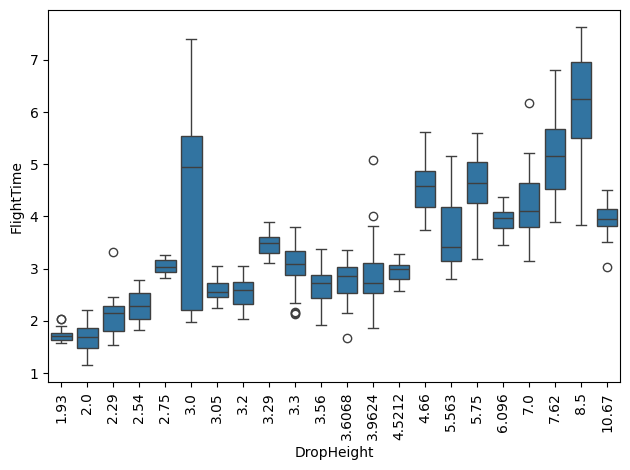

In [103]:
# Creating boxplot For DropHeight vs FlightTime
ax = sns.boxplot(
    x="DropHeight",
    y="FlightTime",
    
    data=final_df
)
# Rotate x-axis labels 
plt.xticks(rotation=90)  

# Adjusting layout to prevent label cutoff
plt.tight_layout()

# Displaying the plot
plt.show()

**Observations**: From our boxplot we can see that the drop of 3.0 meters seems to be like a extreme outlier. It does not make sense that at 3m height I would take even at extreme circustances. The experiment might have been wrong collected or applied. Therefore, I'm dropping all the records for 3.0m heigth.
Also, 10.67m seems off but I'll leave for now to see the impact. 

Iqra CSV File contains Dropheight at 10.67 with low flightime 
Iyer contains the Dropheight at 3.0 with extremely high flighh time. 

In [104]:
final_df = final_df[~((final_df['DropHeight'] == 3.0) )]

In [105]:
# final_df = final_df[~((final_df['DropHeight'] == 10.67))]
# final_df = final_df[~((final_df['DropHeight'] == 5.75) & (final_df['FlightTime'] < 4))]
# final_df = final_df[~((final_df['DropHeight'] == 7.62) & (final_df['FlightTime'] < 4.5))]

**Visualizing our Data and Outliers**

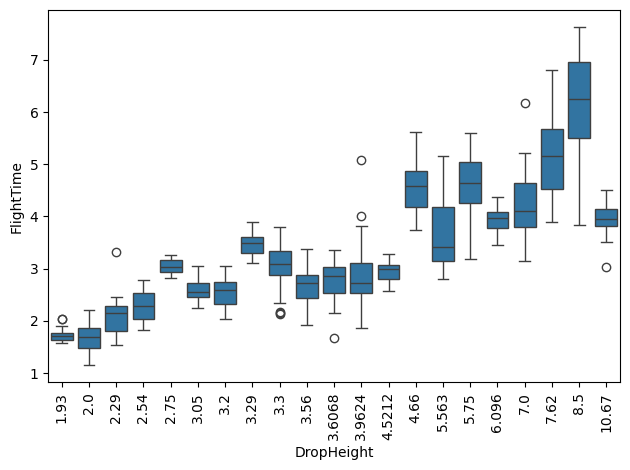

In [106]:
# Creating our updated box plot
ax = sns.boxplot(
    x="DropHeight",
    y="FlightTime",
    
    data=final_df
)
# Rotate x-axis labels 
plt.xticks(rotation=90) 

# Optional: Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

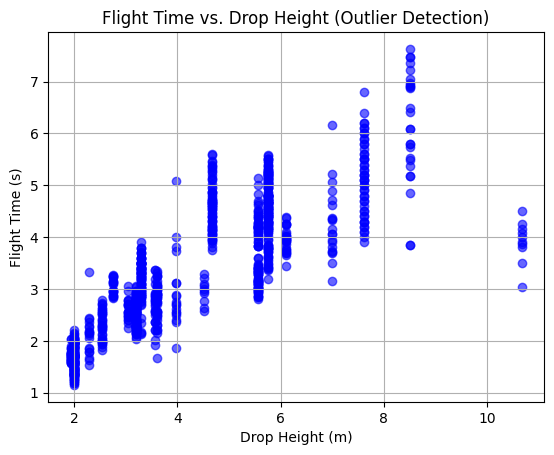

In [107]:
# Scatter plot: FlightTime vs. DropHeight to visualize possible outliers.
plt.scatter(final_df["DropHeight"], final_df["FlightTime"], color='blue', alpha=0.6)
plt.xlabel("Drop Height (m)")
plt.ylabel("Flight Time (s)")
plt.title("Flight Time vs. Drop Height (Outlier Detection)")
plt.grid(True)
plt.show()

In [108]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(final_df["FlightTime"]))

outliers_z = final_df[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[1.05483284 0.40033513 0.90895082 ... 2.74233297 0.41187288 2.82118812]

Outliers based on Z-score > 3:
          NID  DropHeight  FlightTime  \
923  ka778974         8.5        7.48   
924  ka778974         8.5        7.35   
928  ka778974         8.5        7.22   
939  ka778974         8.5        7.63   
992  md891073         8.5        7.48   

                                           Notes  
923                                Student Union  
924                                Student Union  
928  Student Union, Ran into wall multiple times  
939                                Student Union  
992                                 StudentUnion  


In [109]:
# Dropping Extreme Outliers
final_df = final_df.drop(index=923)
final_df = final_df.drop(index=924)
final_df = final_df.drop(index=928)
final_df = final_df.drop(index=992)
final_df = final_df.drop(index=939)

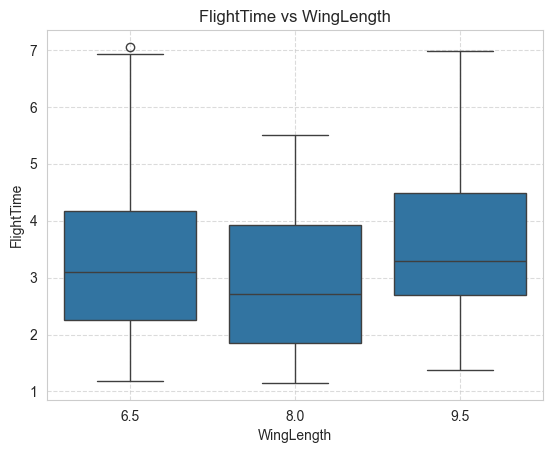

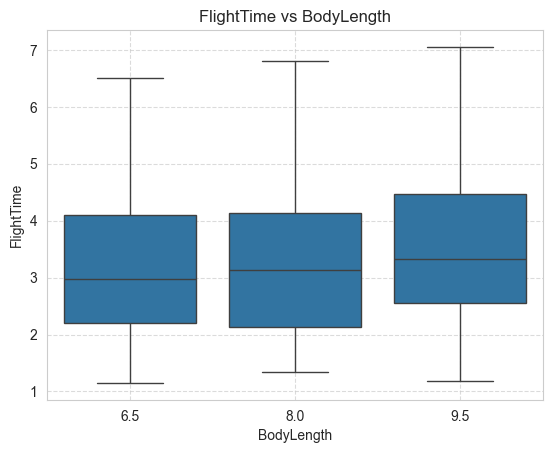

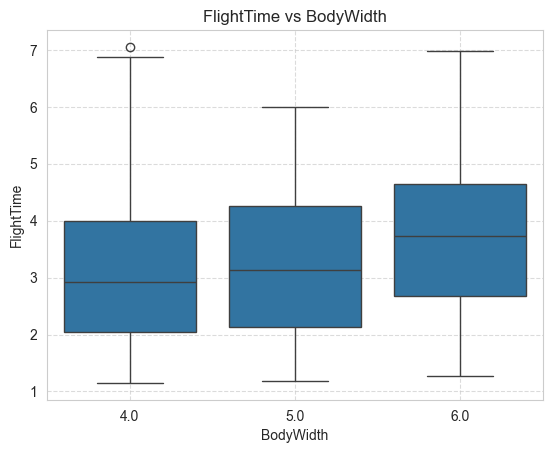

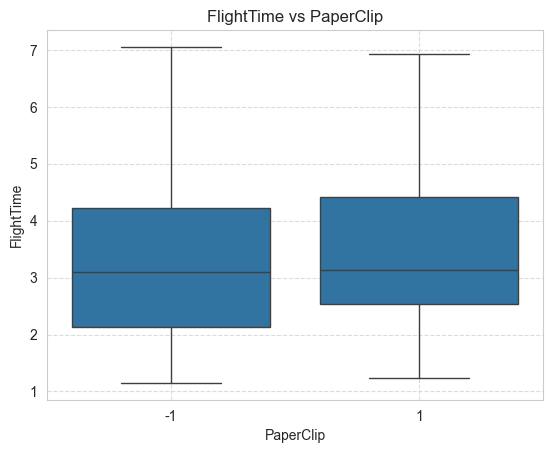

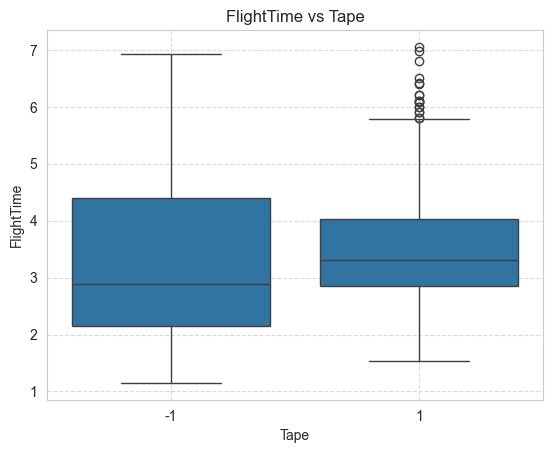

In [110]:
X1 = final_df[['WingLength', 'BodyLength', 'BodyWidth', 'PaperClip', 'Tape']]

#, 'PaperClip', 'Tape'

for feature in X1:
    sns.set_style("whitegrid")
    #plt.figure(figsize=(6.5, 9.5))

    # Creating boxplot
    ax = sns.boxplot(
        x=feature,
        y="FlightTime",
        
        data=final_df
    )
    # Titles and style
    ax.set_title(f"FlightTime vs {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("FlightTime")
    ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.show()

**Comments:** Based the plots, PaperClip and Tape does not seem to have a major effect on FlighTime.

--> **Observations:**
- **Flight time vs Winglength:** Shorter WingeLength slightly increase the Flightime but makin them slightly bigger shortens the FlighTime but Larger WingLength increases Flightime. 
- **Flight time vs BodyLength:** Having small to mid BodyLength does not seem to have an effect on Flight time and increasing it seems to slightly increase time. 
- **Flight time vs BodWidth:** It looks the increase from small-mid-large BodyWidth starts to increase the FlighTime.
- **Flight time vs PaperClip:** No strong effect for this factor. 
- **Flight time vs Tape:** No strong effect for this factor.

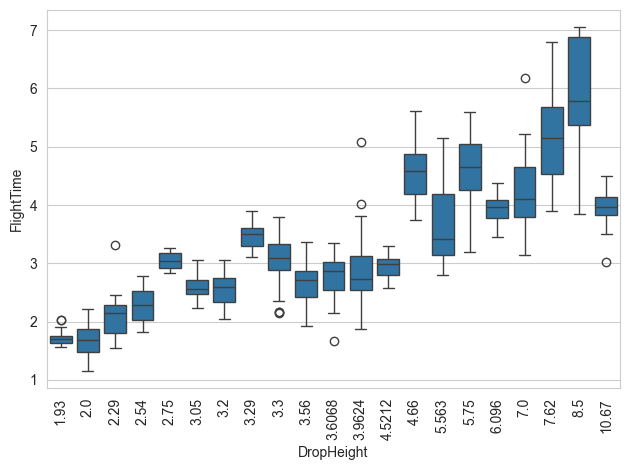

In [111]:
# Creating boxplot
ax = sns.boxplot(
    x="DropHeight",
    y="FlightTime",
    
    data=final_df
)

plt.xticks(rotation=90) 

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

**Observation:**
- **FlightTime vs DropHeight:** In general we can see an up trend almost linear where the higher drops leads to longer times. Except for 10.67 which can also means the helicopter reached maximum altitude. 

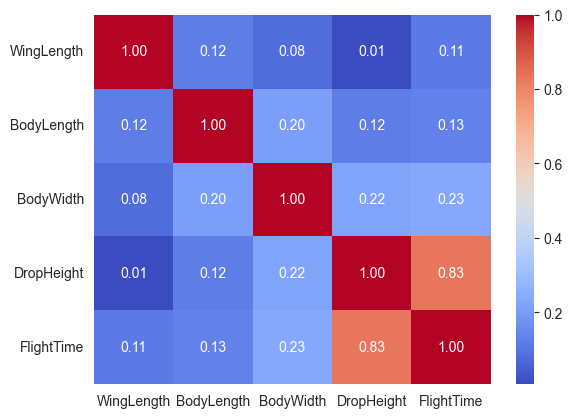

In [112]:
# Creating a heatmap for correlation 
correlation_matrix = final_df[['WingLength', 'BodyLength', 'BodyWidth', 'DropHeight','FlightTime']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### **Regression**

#### **Model 1:**

In [113]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Selecting most interesting factors/features. 
X = final_df[['WingLength', 'BodyLength', 'BodyWidth', 'DropHeight']]
y = final_df['FlightTime']

In [114]:
# Quadratic
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fitting regression model
model = LinearRegression().fit(X_poly, y)

feature_names = poly.get_feature_names_out(['WingLength', 'BodyLength', 'BodyWidth', 'DropHeight'])
coefficients = model.coef_

# Summary into dataframe
summary_df = pd.DataFrame({
    'Term': feature_names,
    'Coefficient': coefficients
})

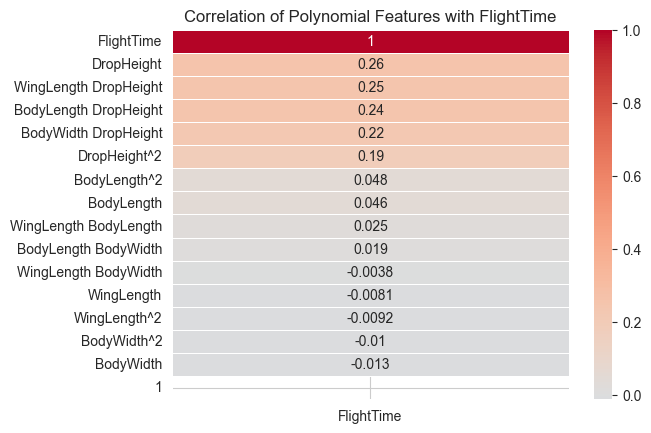

In [115]:
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
X_poly_df['FlightTime'] = y

corr_matrix = X_poly_df.corr()
sns.heatmap(
    corr_matrix[['FlightTime']].sort_values(by='FlightTime', ascending=False),
    annot=True,
    cmap='coolwarm',
    center=0,
    linewidths=0.5    
)

plt.title("Correlation of Polynomial Features with FlightTime")
plt.show()

#### **Summary Regression**

In [116]:
print(summary_df)

                     Term  Coefficient
0                       1     0.000000
1              WingLength    -1.246780
2              BodyLength     0.696117
3               BodyWidth     0.266542
4              DropHeight     0.905963
5            WingLength^2     0.089884
6   WingLength BodyLength    -0.019670
7    WingLength BodyWidth     0.000031
8   WingLength DropHeight     0.012227
9            BodyLength^2    -0.030094
10   BodyLength BodyWidth    -0.015291
11  BodyLength DropHeight     0.007958
12            BodyWidth^2    -0.028336
13   BodyWidth DropHeight     0.032718
14           DropHeight^2    -0.068860


**Summary Analysis From Regression**
- **Linear Terms:** Based on the linear terms WingLength has a negative coefficient suggestoin that increasing the wings (longer) reduce time. BodyLength has a possitive effect where longer bodies increase time. BodyWidth is also slightly positive which leads to wider bodies slightly increases time. DropHeight a strong positive effect which means that higher drops signficantly increases time. 

- **Quadratic/Squared Terms^2:** Based on the quadratic terms now WingLength has possitive effect which implies a U-shape relationship. BodyLength, BodyWidth and DropHeight now have nagative effect which can indicates that going beyond an optimal point for these factors time starts to decrease meaning that the helicopters will drop faster to conditions like drag, center mass, and being stable. 


- **Interaction Terms:** Based on the interction terms and their coeffcients **(WingLength:BodyLength)** have a negative interaction which means that longer bodies and longer wings descreases flight time or vice versa.  but short wings and long body can be more stable. **(WingLength BodyWidth)** the coefficient for this interaction neglible (almost 0) meaning that not meaninful interaction. **(WingLength DropHeight)** this interaction has a small positive effect which can mean that at greater heights long wings can stabilize the model while at short at short heights matters less. **(BodyLength BodyWidth)** This interaction has a negative coefficient which can lead to wider bodies reduce the benefit of longer bodies or vice versa. **(BodyLength DropHeight)** interaction has very low positive effect which means that higher drop very slightly enhances the benefit of longer bodies. **(BodyWidth DropHeight)** this interaction is the strongest from all which means that wider bodies significantly improves time at high drops which can mean that it makes the helicopter more stable. 

In [117]:
# Finding statistical signficant for the model. 
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
y = y.reset_index(drop=True)
model = sm.OLS(y, X_poly_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             FlightTime   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     262.4
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:31:41   Log-Likelihood:                -931.22
No. Observations:                1059   AIC:                             1892.
Df Residuals:                    1044   BIC:                             1967.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
1                         1.27

**Comments:** 
- Based on the **R-squared**, the model explains 77.9% of the varience in FlightTime which is a strong fit for real-world data when combined with the other files.
- **Adjusted R-square** is also high which means the polynomial terms did not overfit the data. 
- The **F-statistics** of p=0.00 makes this model significant. 
- Based on the the **p values** the variables that are highly significant with p=0.00 are DropHeight, DropHeight^2,WingLength, WingLength^2, and BodyWidth DropHeight having p = 0.006. BodyLength is slightly signficant along with WingLength BodyLength. Now, BodyWidth, BodyWidth^2 are not significant which can be drop. 

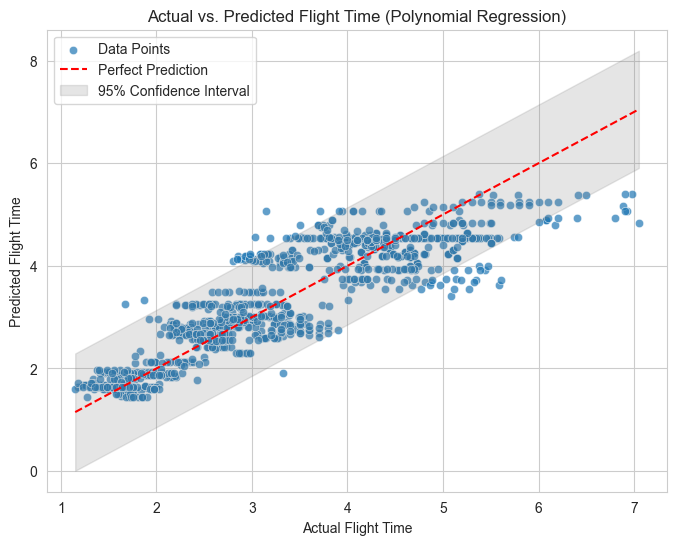

In [118]:
# Getting predicted values and residuals
y_pred = model.predict(X_poly)
residuals = y - y_pred

# standard deviation of residuals
residual_std = np.std(residuals)

# confidence intervals (95% CI)
ci = 1.96 * residual_std  # 1.96 for 95% CI

# Creating the plot
plt.figure(figsize=(8, 6))

# Plotting the data points
sns.scatterplot(x=y, y=y_pred, alpha=0.7, label='Data Points')

# Plotting perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')

# Plotting confidence intervals
plt.fill_between([y.min(), y.max()], 
                 [y.min()-ci, y.max()-ci], 
                 [y.min()+ci, y.max()+ci], 
                 color='gray', alpha=0.2, label='95% Confidence Interval')

plt.xlabel('Actual Flight Time')
plt.ylabel('Predicted Flight Time')
plt.title('Actual vs. Predicted Flight Time (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

The same models with only signficant terms. 

In [119]:


# Define X and y
X = final_df[['WingLength', 'BodyLength', 'BodyWidth', 'DropHeight']]
y = final_df['FlightTime']

# Build Polynomial Features manually
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
X_poly_full = poly.fit_transform(X)
feature_names_full = poly.get_feature_names_out(['WingLength', 'BodyLength', 'BodyWidth', 'DropHeight'])

# Create a DataFrame
X_poly_full_df = pd.DataFrame(X_poly_full, columns=feature_names_full)

# Keep only important terms
keep_terms = [
    '1', 'WingLength', 'BodyLength', 'BodyWidth', 'DropHeight',
    'WingLength^2', 'DropHeight^2', 'BodyWidth DropHeight'
]
X_reduced = X_poly_full_df[keep_terms]
y = y.reset_index(drop=True)
# Fit model
model = sm.OLS(y, X_reduced).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             FlightTime   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     521.3
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:31:42   Log-Likelihood:                -936.64
No. Observations:                1059   AIC:                             1889.
Df Residuals:                    1051   BIC:                             1929.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
1                        4.1850 

From p values we can see now that BodyLength is no longer significant and can be drop. DropHeight, DropHeight^2  still strong predictors but also indicating that it has an optimal height. WingLength increases slightly flighttime if its very long. 

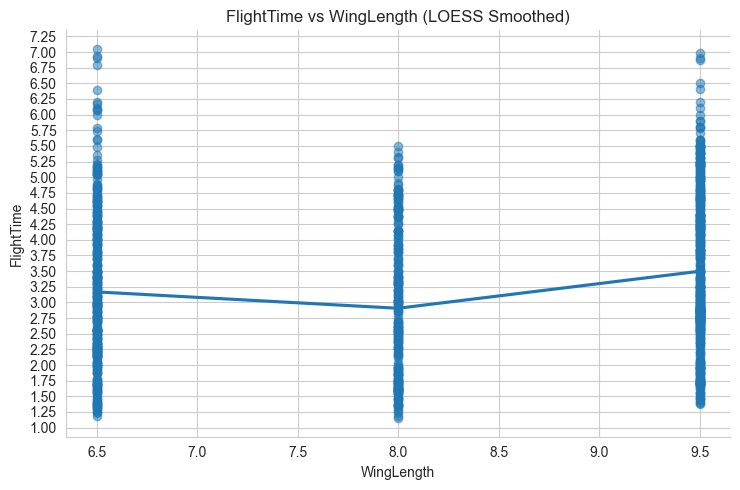

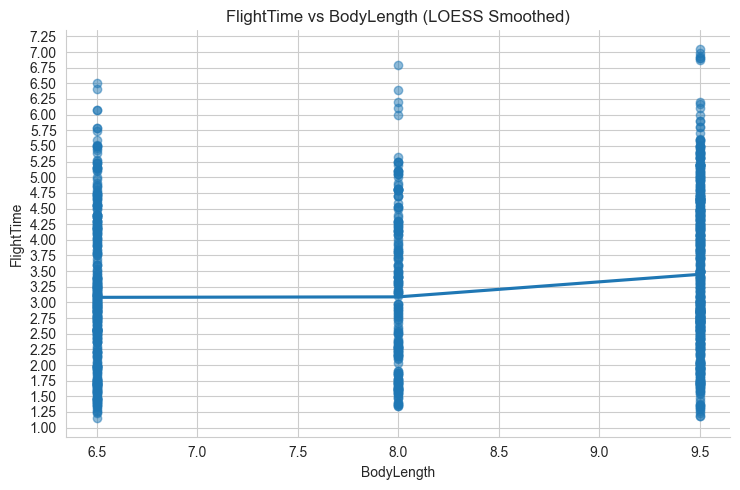

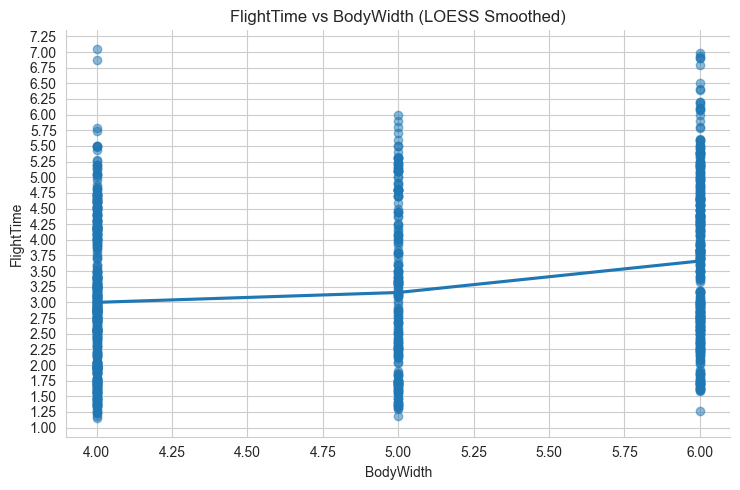

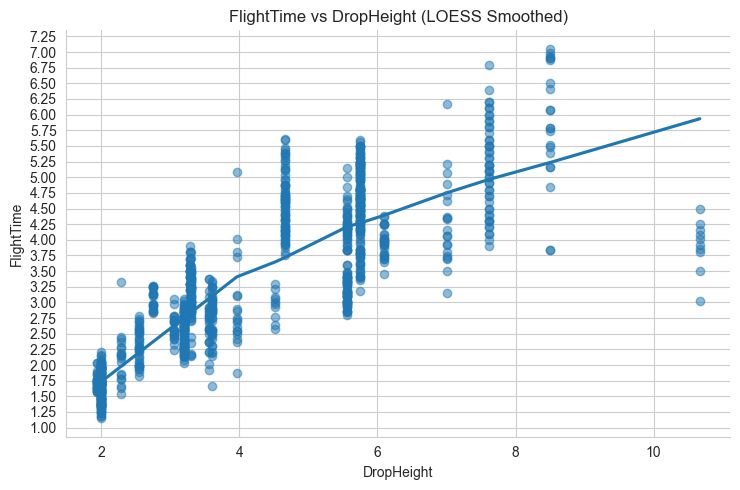

In [120]:
for j in X:
    # Creating the plot
    g = sns.lmplot(
        data=final_df,
        x=j,
        y='FlightTime',
        lowess=True,
        height=5,
        aspect=1.5,
        scatter_kws={'alpha': 0.5}
    )
    
    # Setting title and labels
    g.set(
        title=f'FlightTime vs {j} (LOESS Smoothed)',
        xlabel=j,
        ylabel='FlightTime'
    )
    
    # #  Customizing y-axis ticks
    for ax in g.axes.flat:  # Loop through all subplots 
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))  # Increment by 0.2
    
    plt.tight_layout()
    plt.show()

In [121]:
from sklearn.ensemble import RandomForestRegressor

# Fitting random forest n decision tree regresors = 100
# Solid ramdom state
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_poly, y)

RandomForestRegressor(random_state=42)

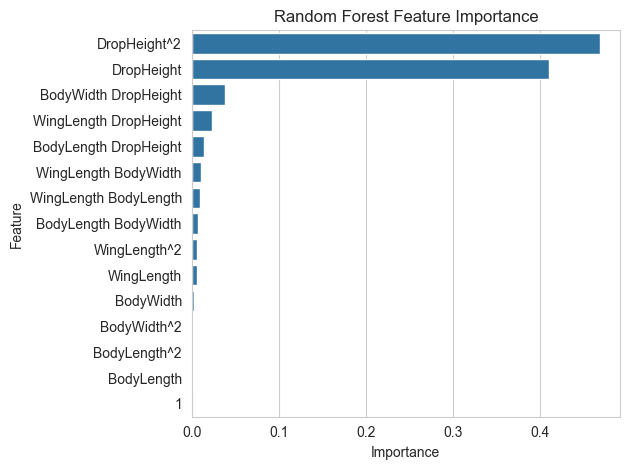

In [122]:
# Extracting importance
importances = rf.feature_importances_

# Putting into data frame in descending order
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Creating barplot
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

##### **Model 2**

For this model I'm going to drop the Height of 10.67m and check for outliers and regression results. 

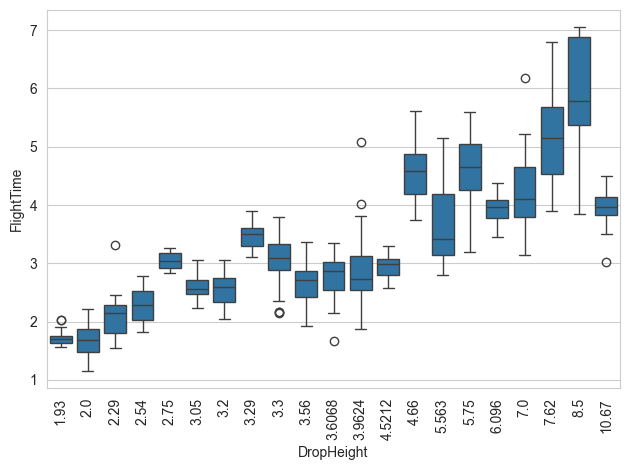

In [123]:
# Creating boxplot
ax = sns.boxplot(
    x="DropHeight",
    y="FlightTime",
    
    data=final_df
)
# Rotate x-axis labels (e.g., 45 degrees)
plt.xticks(rotation=90) 

# Optional: Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [124]:
final_df = final_df[~((final_df['DropHeight'] == 10.67))]

In [125]:
# Calculate Z-scores for FlightTime
z_scores = np.abs(stats.zscore(final_df["FlightTime"]))

outliers_z = final_df[z_scores > 3]  # Rows with FlightTime Z-score > 3 (extreme outliers)
print(z_scores)

print() # Space

print("Outliers based on Z-score > 3:")
print(outliers_z[["NID","DropHeight", "FlightTime", "Notes"]])

[1.09641251 0.42870402 0.94758592 ... 2.81797417 0.39989808 2.89842097]

Outliers based on Z-score > 3:
          NID  DropHeight  FlightTime          Notes
938  ka778974         8.5        7.05  Student Union


In [126]:
final_df = final_df.drop(index=938)

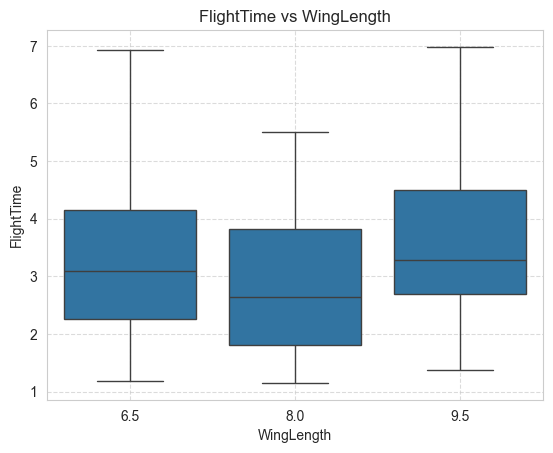

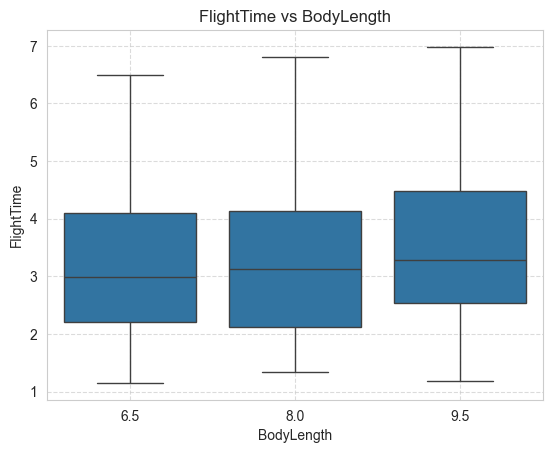

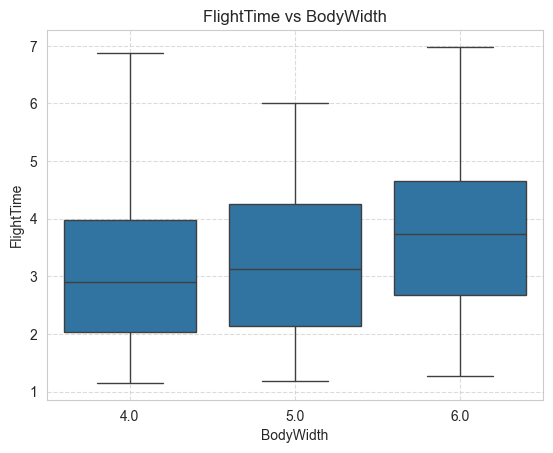

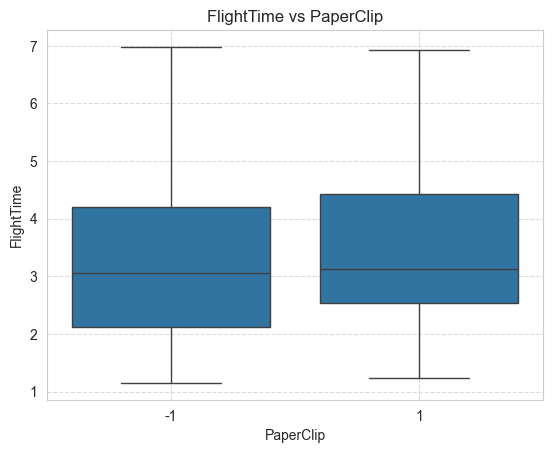

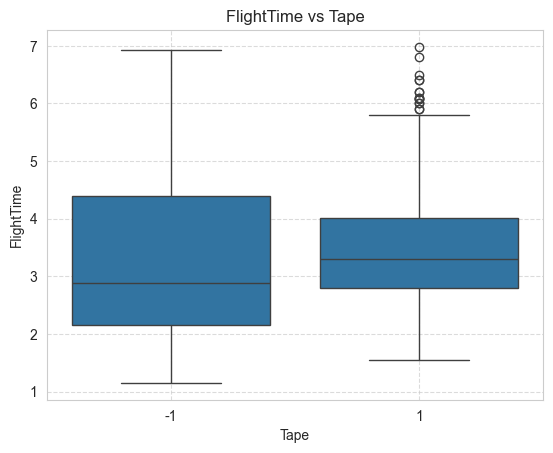

In [127]:
for feature in X1:
    sns.set_style("whitegrid")
    #plt.figure(figsize=(6.5, 9.5))

    # Creating boxplot
    ax = sns.boxplot(
        x=feature,
        y="FlightTime",
        
        data=final_df
    )
    # Titles and style
    ax.set_title(f"FlightTime vs {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("FlightTime")
    ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.show()

For the boxplots we almost get identical results. 

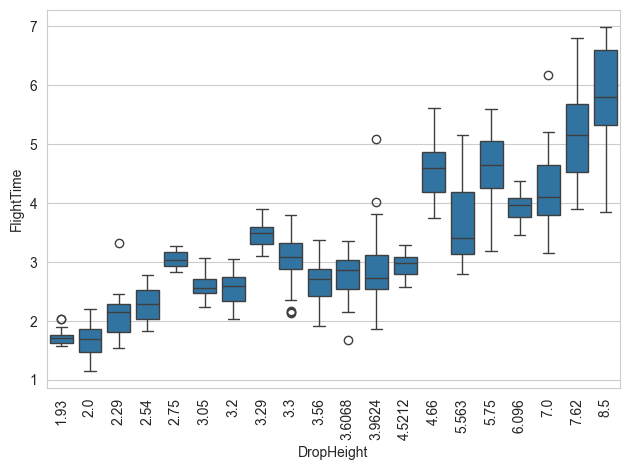

In [128]:
# Creating boxplot
ax = sns.boxplot(
    x="DropHeight",
    y="FlightTime",
    
    data=final_df
)
# Rotate x-axis labels (e.g., 45 degrees)
plt.xticks(rotation=90) 

# Optional: Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

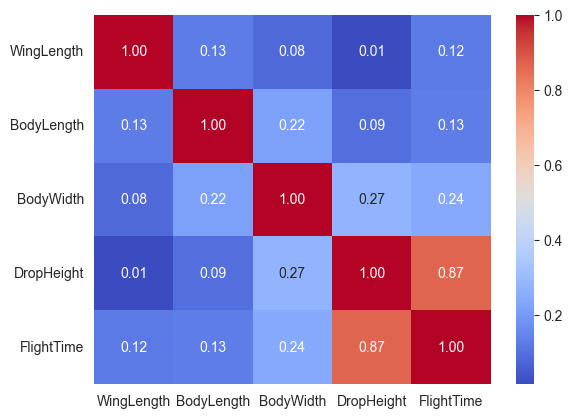

In [129]:
# Creating a heatmap for correlation 
correlation_matrix = final_df[['WingLength', 'BodyLength', 'BodyWidth', 'DropHeight','FlightTime']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [130]:
# Selecting most interesting factors/features. 
X = final_df[['WingLength', 'BodyLength', 'BodyWidth', 'DropHeight']]
y = final_df['FlightTime']

In [131]:
# Quadratic
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fitting regression model
model = LinearRegression().fit(X_poly, y)

feature_names = poly.get_feature_names_out(['WingLength', 'BodyLength', 'BodyWidth', 'DropHeight'])
coefficients = model.coef_

# Summary into dataframe
summary_df = pd.DataFrame({
    'Term': feature_names,
    'Coefficient': coefficients
})

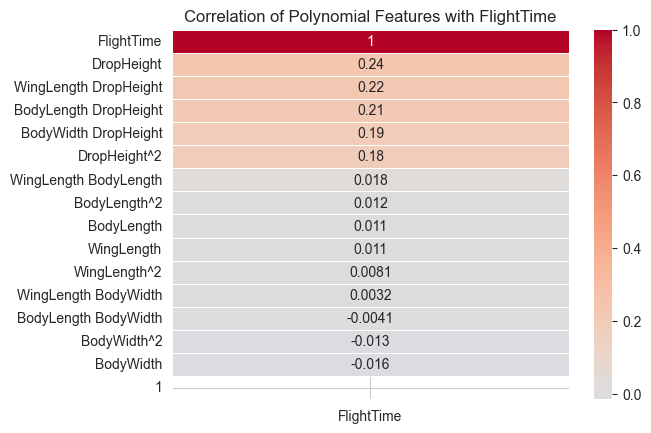

In [132]:
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
X_poly_df['FlightTime'] = y

corr_matrix = X_poly_df.corr()
sns.heatmap(
    corr_matrix[['FlightTime']].sort_values(by='FlightTime', ascending=False),
    annot=True,
    cmap='coolwarm',
    center=0,
    linewidths=0.5    
)

plt.title("Correlation of Polynomial Features with FlightTime")
plt.show()

In [133]:
print(summary_df)

                     Term  Coefficient
0                       1     0.000000
1              WingLength    -1.111851
2              BodyLength     0.649768
3               BodyWidth     0.150032
4              DropHeight     0.708694
5            WingLength^2     0.082474
6   WingLength BodyLength    -0.020345
7    WingLength BodyWidth    -0.006037
8   WingLength DropHeight     0.018375
9            BodyLength^2    -0.026046
10   BodyLength BodyWidth    -0.029911
11  BodyLength DropHeight     0.023861
12            BodyWidth^2     0.014893
13   BodyWidth DropHeight    -0.005920
14           DropHeight^2    -0.044340


In [134]:
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
y = y.reset_index(drop=True)
model = sm.OLS(y, X_poly_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             FlightTime   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     273.3
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:31:43   Log-Likelihood:                -899.68
No. Observations:                1048   AIC:                             1829.
Df Residuals:                    1033   BIC:                             1904.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
1                         1.53

**Comments**: This model has a higher R-squared and also a higher adjusted r-squared with a lowe AIC and higher F-statistics which indicates a better overall fit. 

In this model WingLength:DropHeight are significant BodyLength:DropHeight are significant and WinLength:BodyLength is in the borderline of being significant. 

**For the factors -->** 
- **WingLength** still reduced flightime until a certain point because **WingLength^2** creates a positive U-sahped meaning that very long wings increases flighttime. Therefore, the optimal will be either very short or very long wings. 
- **DropHeight** produces longer Flightime but until a certain point, it seems that the helicopter reached its maximum altitud/optimal point noted on **DropHeight^2**,
- **BodyLength** is on the margin of being signficant which can lead to longer bodies increasing time.
- **WingLength:BodyLength** has a significant negative interaction which means that long wings and long bodies togheter make it less effective. 
- **BodyLength:DropHeight** has a postive and significant interaction meaning that if the helicpter is dropped from higher place and has a longer body flight time increases.
- **WingLength:DropHeight** Suggest that long wings are more effective and higher drops. 

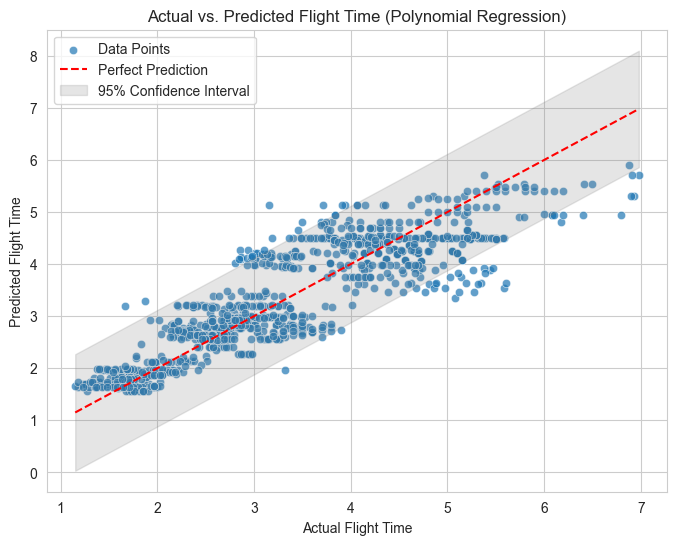

In [135]:
# Getting predicted values and residuals
y_pred = model.predict(X_poly)
residuals = y - y_pred

# standard deviation of residuals
residual_std = np.std(residuals)

# confidence intervals (95% CI)
ci = 1.96 * residual_std  # 1.96 for 95% CI

# Creating the plot
plt.figure(figsize=(8, 6))

# Plotting the data points
sns.scatterplot(x=y, y=y_pred, alpha=0.7, label='Data Points')

# Plotting the perfect prediction line
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')

# Plotting confidence intervals
plt.fill_between([y.min(), y.max()], 
                 [y.min()-ci, y.max()-ci], 
                 [y.min()+ci, y.max()+ci], 
                 color='gray', alpha=0.2, label='95% Confidence Interval')

plt.xlabel('Actual Flight Time')
plt.ylabel('Predicted Flight Time')
plt.title('Actual vs. Predicted Flight Time (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [136]:
# Define X and y
X = final_df[['WingLength', 'BodyLength', 'BodyWidth', 'DropHeight']]
y = final_df['FlightTime']

# Build Polynomial Features manually
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
X_poly_full = poly.fit_transform(X)
feature_names_full = poly.get_feature_names_out(['WingLength', 'BodyLength', 'BodyWidth', 'DropHeight'])

# Create a DataFrame
X_poly_full_df = pd.DataFrame(X_poly_full, columns=feature_names_full)

# Keep only important terms
keep_terms = [
    '1', 'WingLength', 'BodyLength', 'BodyWidth', 'DropHeight',
    'WingLength^2', 'DropHeight^2', 'BodyWidth DropHeight', 'WingLength BodyLength', 'WingLength DropHeight',
    'BodyLength BodyWidth', 'BodyLength DropHeight'
]
X_reduced = X_poly_full_df[keep_terms]
y = y.reset_index(drop=True)
# Fit model
model = sm.OLS(y, X_reduced).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             FlightTime   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     348.1
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:31:44   Log-Likelihood:                -900.48
No. Observations:                1048   AIC:                             1825.
Df Residuals:                    1036   BIC:                             1884.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
1                         2.59

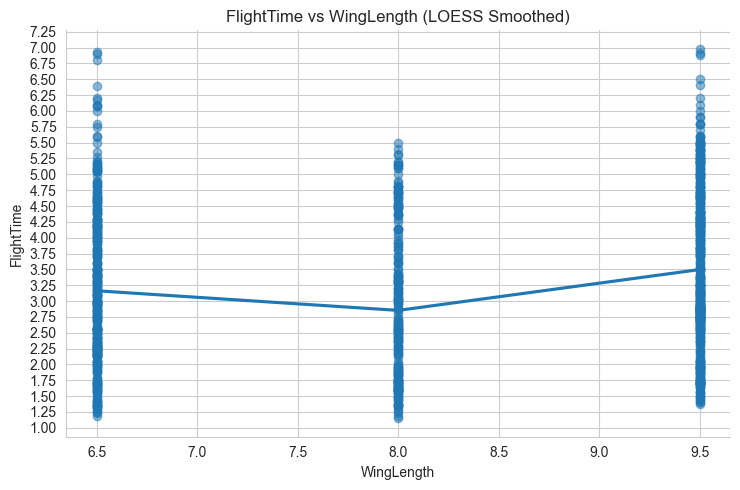

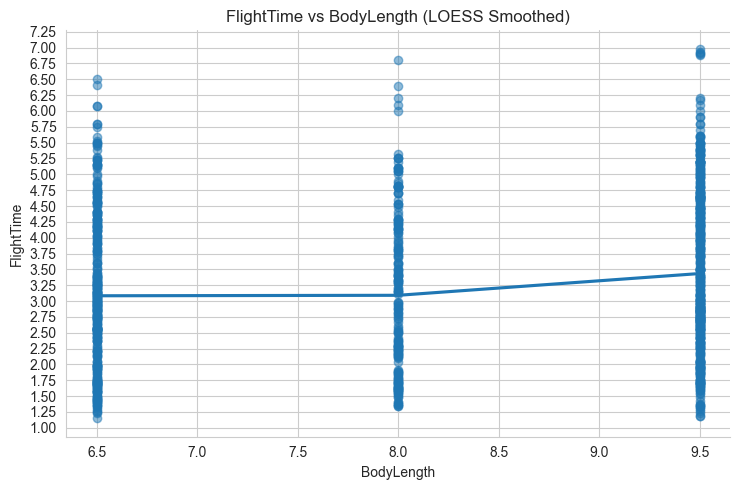

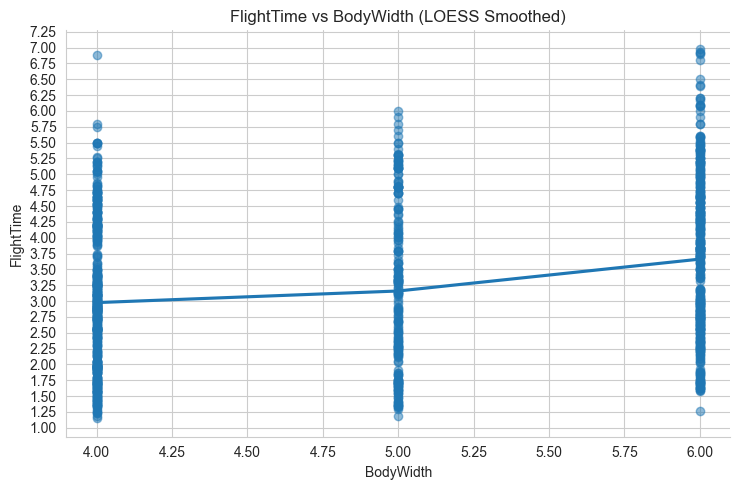

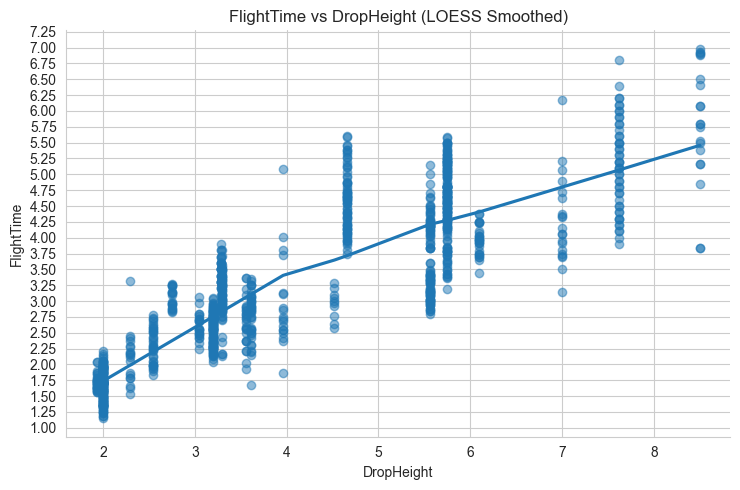

In [137]:
for j in X:
    # Creating the plot
    g = sns.lmplot(
        data=final_df,
        x=j,
        y='FlightTime',
        lowess=True,
        height=5,
        aspect=1.5,
        scatter_kws={'alpha': 0.5}
    )
    
    # Setting title and labels
    g.set(
        title=f'FlightTime vs {j} (LOESS Smoothed)',
        xlabel=j,
        ylabel='FlightTime'
    )
    
    # #  Customizing y-axis ticks
    for ax in g.axes.flat:  # Loop through all subplots 
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))  # Increment by 0.2
    
    plt.tight_layout()
    plt.show()

In [138]:

# Fitting random forest n decision tree regresors = 100
# Solid ramdom state
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_poly, y)

RandomForestRegressor(random_state=42)

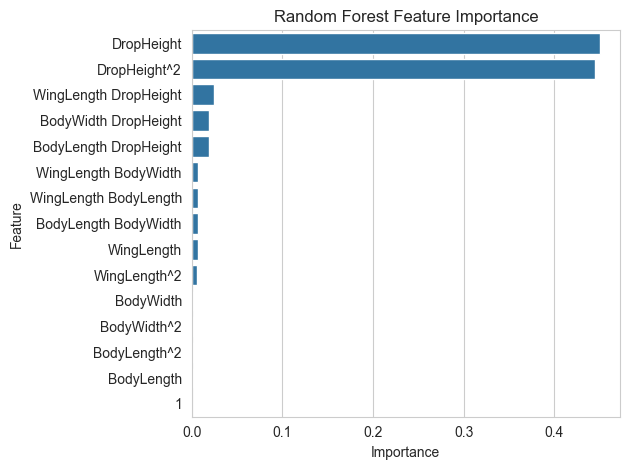

In [139]:
# Extracting importance
importances = rf.feature_importances_

# Putting into data frame in descending order
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Creating barplot
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

### **Summary:**

- DropHeight is the most critical predictor for the helicopter but also seems to have an optimal point where time seems to stop increasing. At this same point having very short or very long wins seems to help the flightime. 

- The most important interactions are betweem WingLength:BodyLength with a negative effect with combining long wings and long bodies. BodyLength:DropHeight has a positive interaction meaning that longer bodies can help and higher drops. Finally, BodyWidth:DropHeight is slighty significant 

To maximaze flighttime we need to avoid mid range wings, user longer bodies for high drops, and avoid combining long wings and long bodies at the same time. 